In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

try:
    import cPickle as pickle
except ImportError:
    import pickle

%matplotlib inline

sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("Set1")

plt.rcParams['figure.figsize'] = (15.0, 10.0)
plt.rcParams['axes.titlesize'] = 'large'
plt.rcParams['axes.labelsize'] = 'large'

# Dataset 

## Información general
RAVDESS | Ryerson Audio-Visual Database of Emotional Speech and Song 
--- | --- 
Idioma | North American English
Muestras | 1440
Emociones | anger calm disgust fear happiness sadness surprise neutral
Nº de actores | 24 (12H 12M)
Naturaleza | Simulada
URLs | [Documentación](https://smartlaboratory.org/ravdess/) - [Paper construcción RAVDESS](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0196391)

Emotional intensity (01 = normal, 02 = strong)

**Archivos**

carcterística | valor
--- | --- 
codec | PCM S16 LE
channels | Mono
sample rate  | 16000 Hz
bit rate | 16 kbps



## Selección de muestras
Emociones de estudio
- anger 
- disgust 
- fear 
- happiness 
- sadness

Cargando el objeto del dataset

In [5]:
dataset = "ravdess-01234"
dataset_path = "data/" + dataset + "/"
print("Loading data from " + dataset + " data set...")
ds = pickle.load(open(dataset_path + dataset + '_db.p', 'rb'))
number_instances = len(ds.targets)

Loading data from ravdess-01234 data set...


**Número de instancias**

In [6]:
print("Number of instances: " + str(number_instances))

Number of samples: 480


**Distribución de duración** de los audios

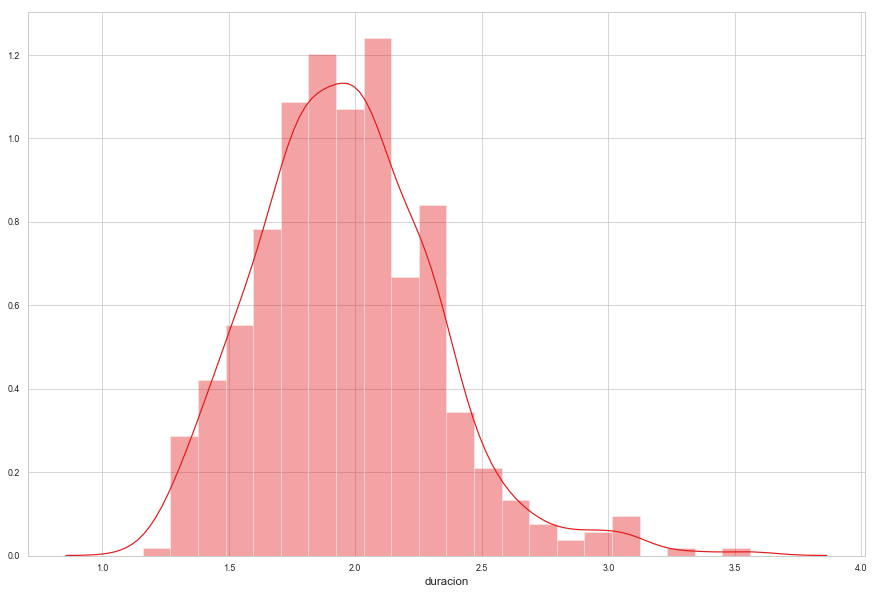

In [8]:
duracion = []
for i in range(0, number_instances):
    duracion.append((ds.data[i][0].size) / 16000)

df_duracion = pd.Series(data=duracion, name="duracion")
sns.distplot(df_duracion)

Numero de **muestras por emoción**:

In [9]:
df_emotions = pd.Series(data=ds.targets, name="emotion", dtype="category")
df_emotions = df_emotions.map(lambda i: ds.dictionary[i])
df_emotions.value_counts()

sadness      96
happiness    96
fear         96
disgust      96
anger        96
Name: emotion, dtype: int64

**Distribución de duración según la emoción**

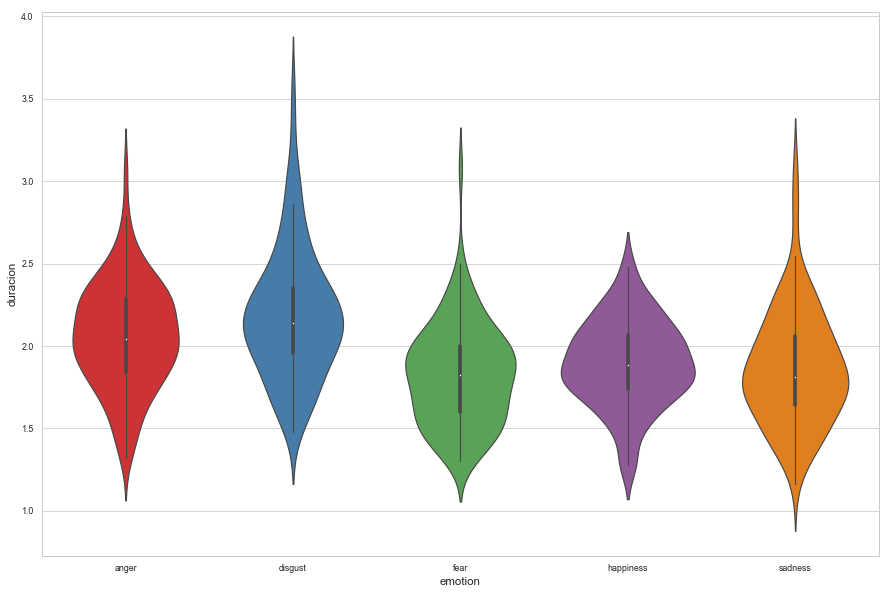

In [10]:
df_aux = pd.concat([df_emotions, df_duracion], axis=1)
sns.violinplot(x=df_aux["emotion"], y=df_aux["duracion"])

## Selección de la longitud de ventana de muestreo

In [11]:

df_compare_frame_size = pd.read_csv('data/compare_frame_size_csv/' + dataset +
                                    '.csv')
df_compare_frame_size.head()

zcr    energy  energy_entropy  spectral_centroid  spectral_spread  \
0 -0.032619 -0.050873        0.166969          -0.028185        -0.036674   
1 -0.046932 -0.066242        0.130104          -0.043132        -0.052361   
2 -0.043533 -0.059868        0.140582          -0.038933        -0.046286   
3 -0.059756 -0.074098        0.110116          -0.055634        -0.062045   
4 -0.066962 -0.081587        0.089835          -0.063199        -0.069761   

   spectral_entropy  spectral_flux  spectral_rolloff    mfcc_1    mfcc_2  ...  \
0          0.069871      -0.051447         -0.021978 -2.340279 -0.274874  ...   
1          0.038519      -0.066494         -0.037549 -2.213589 -0.232302  ...   
2          0.048774      -0.060341         -0.033706 -2.206801 -0.249445  ...   
3          0.017554      -0.074670         -0.051561 -1.998767 -0.246351  ...   
4          0.002496      -0.081951         -0.059021 -1.949265 -0.217343  ...   

   chroma_8  chroma_9  chroma_10  chroma_11  chroma_12  chroma_std  \
0 -0.050772 -0.051681  -0.051357  -0.050799  -0.051830   -0.050745   
1 -0.065856 -0.066864  -0.066585  -0.065578  -0.066865   -0.065884   
2 -0.059835 -0.060696  -0.060397  -0.059625  -0.060721   -0.059476   
3 -0.073994 -0.075003  -0.074720  -0.074052  -0.074994   -0.073880   
4 -0.081269 -0.082341  -0.082120  -0.081046  -0.082348   -0.081293   

   harmonic_ratio     pitch  frame_size    emotion  
0       -0.041675  4.180531       0.015      anger  
1       -0.052697  4.507528       0.015    disgust  
2       -0.050049  4.309271       0.015       fear  
3       -0.062079  4.611065       0.015  happiness  
4       -0.067533  4.771250       0.015    sadness  

[5 rows x 38 columns]

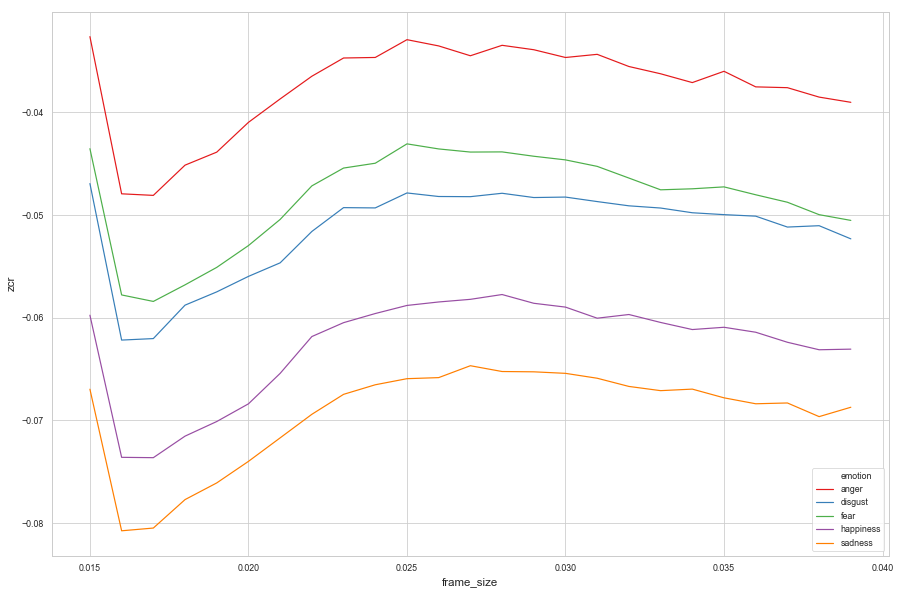

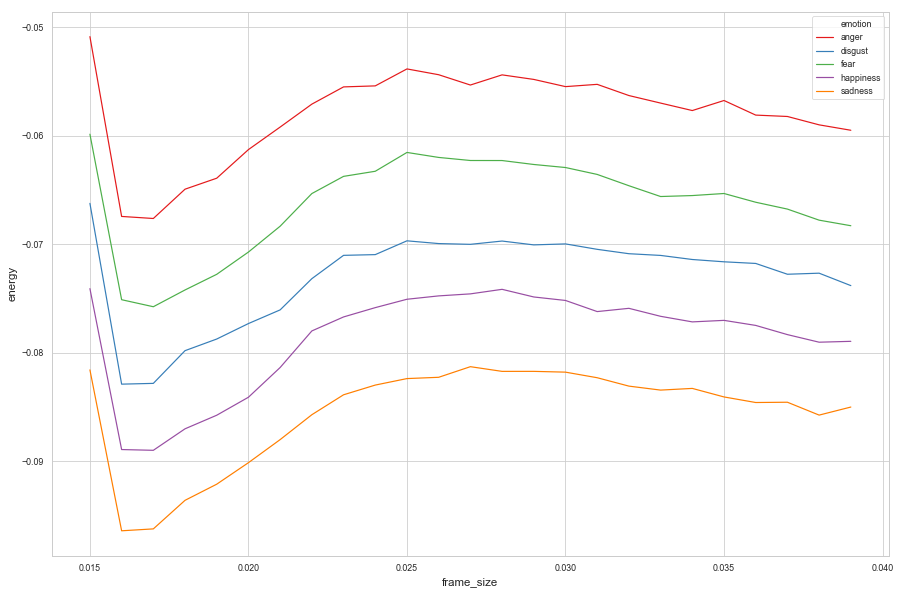

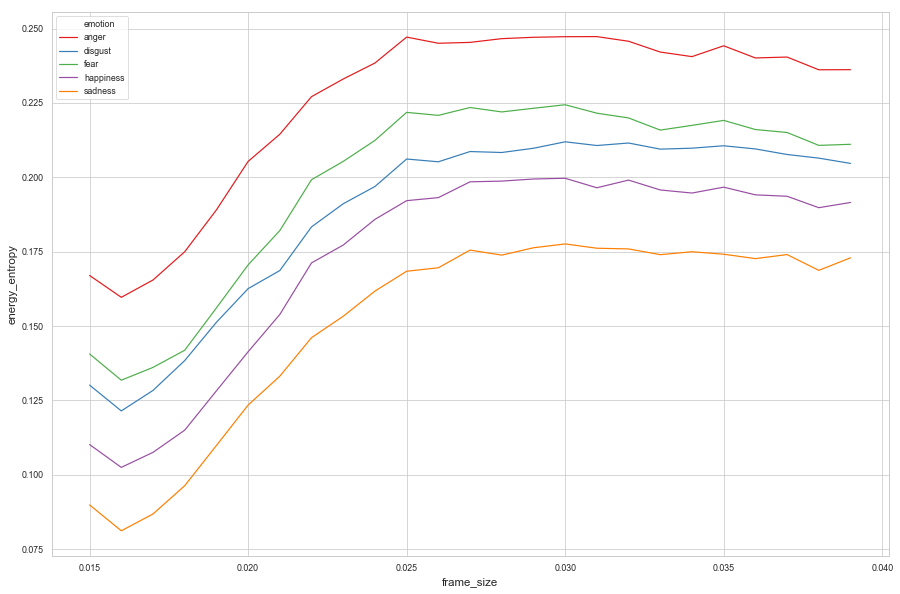

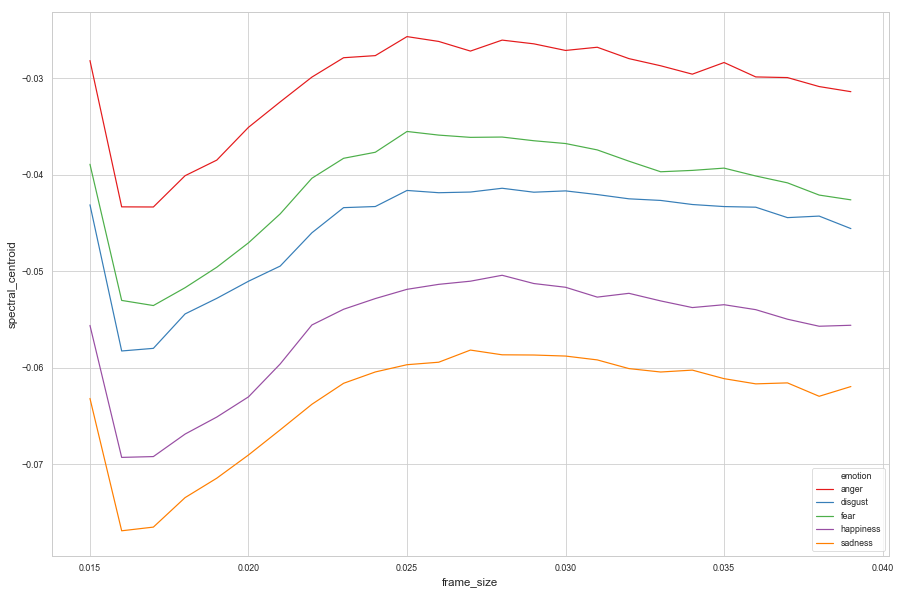

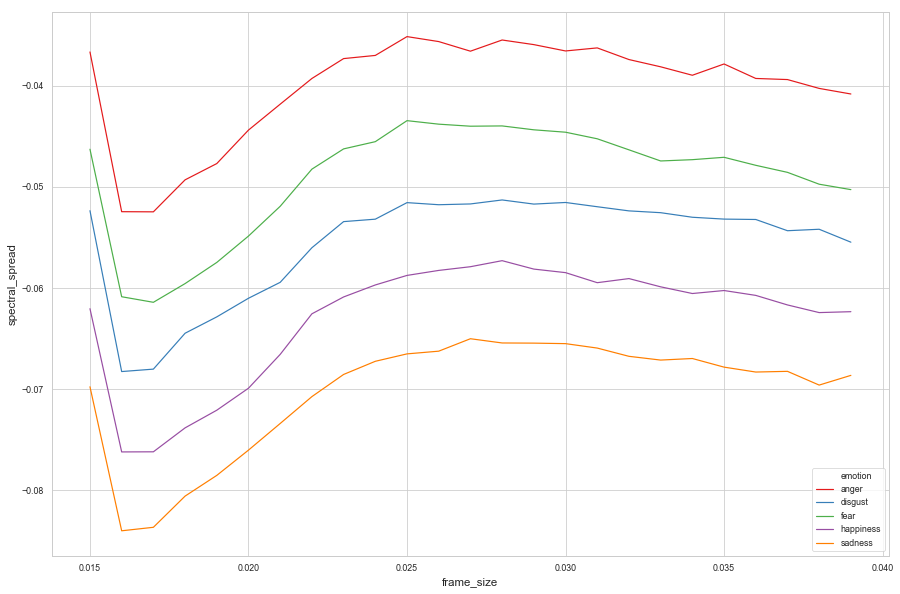

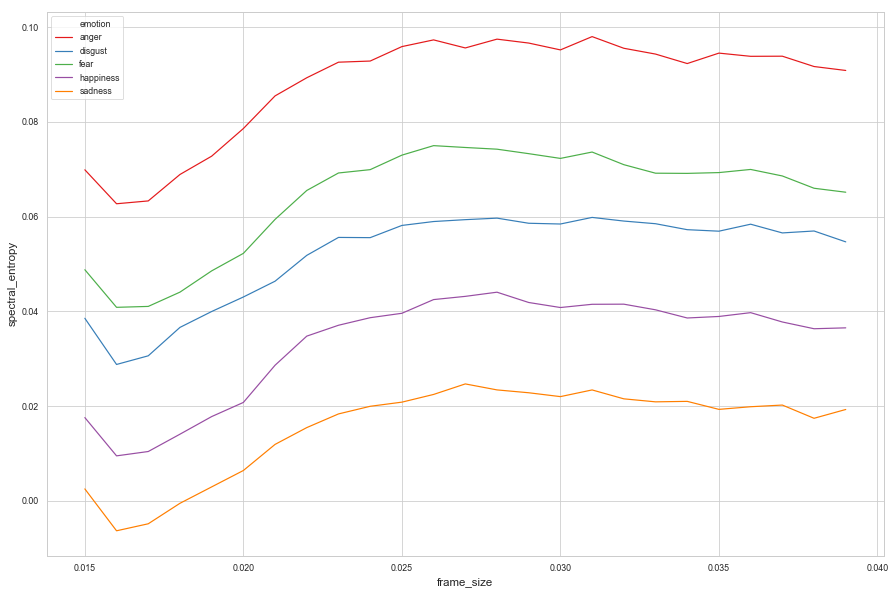

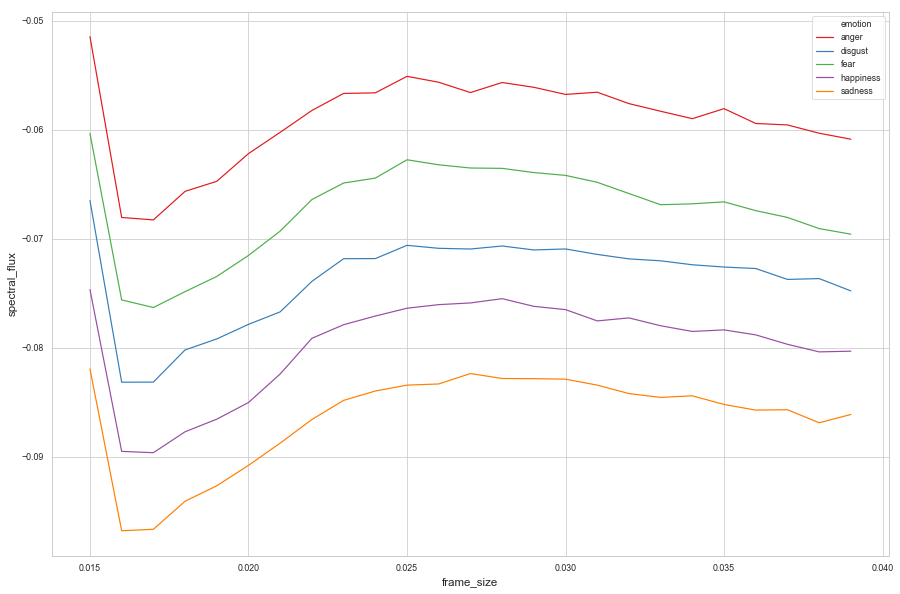

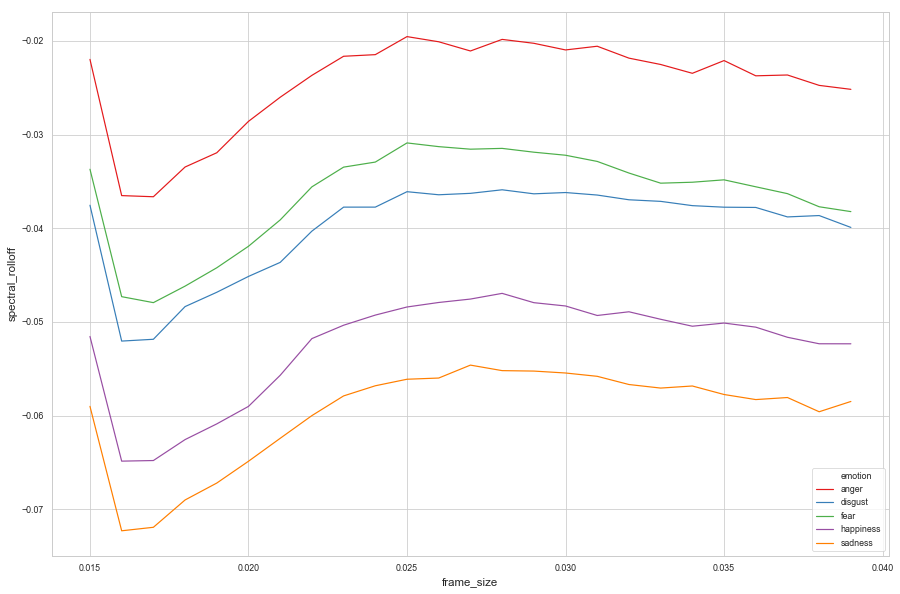

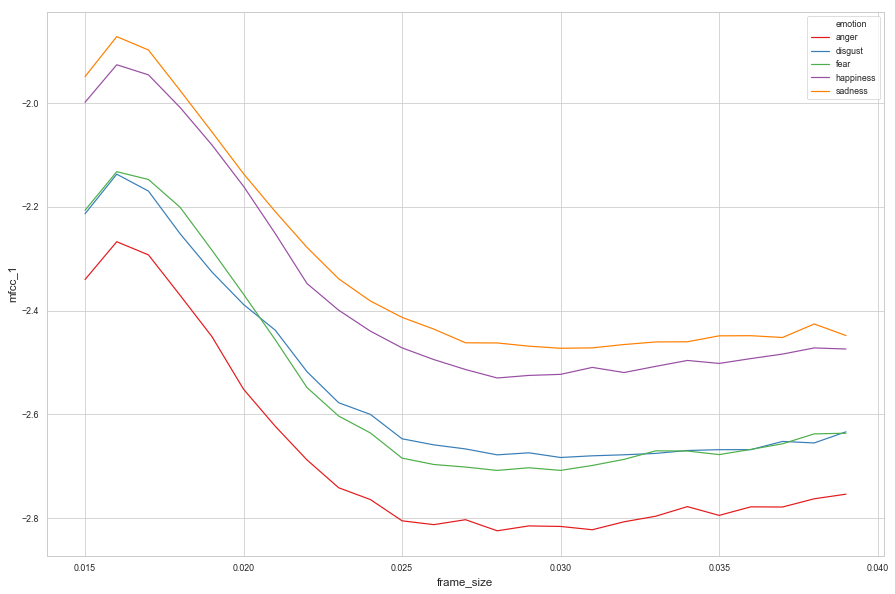

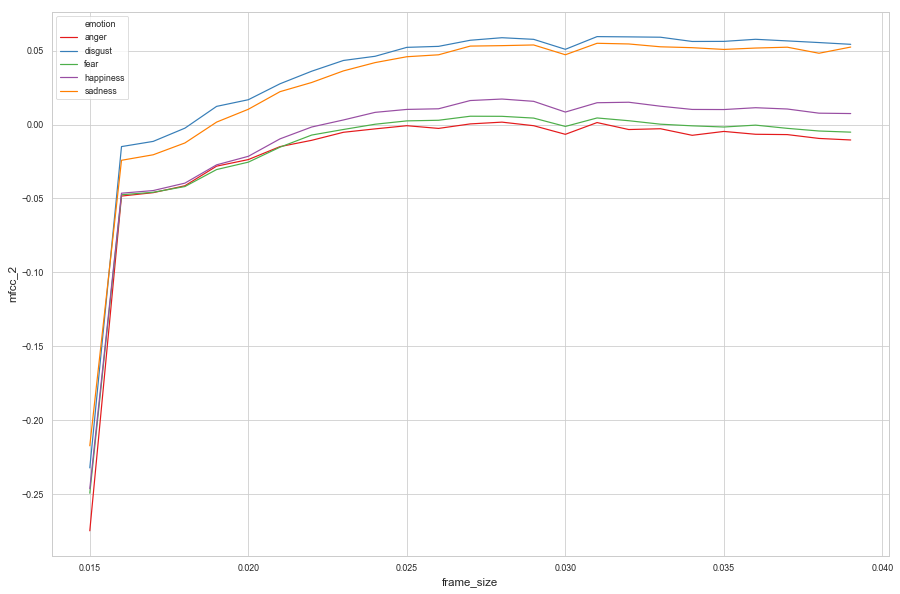

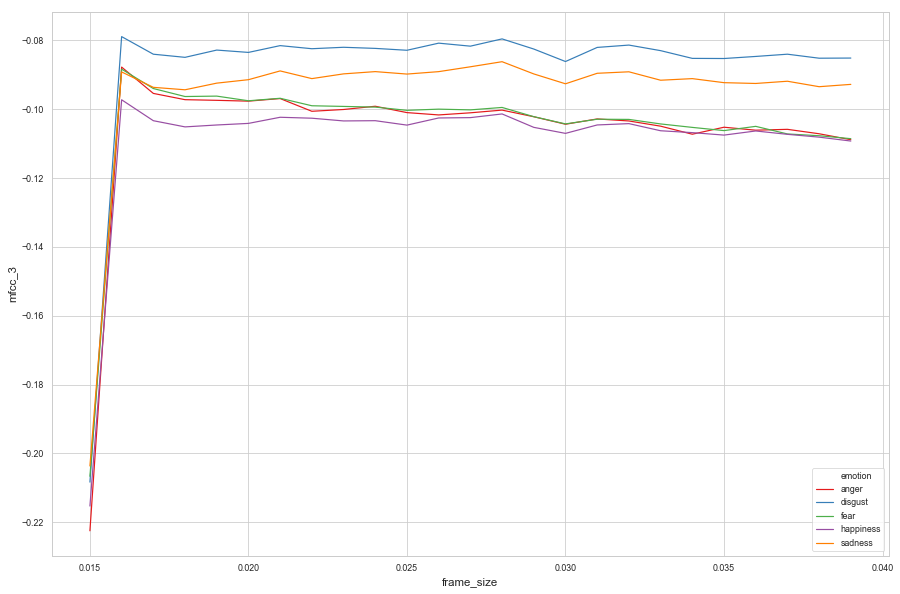

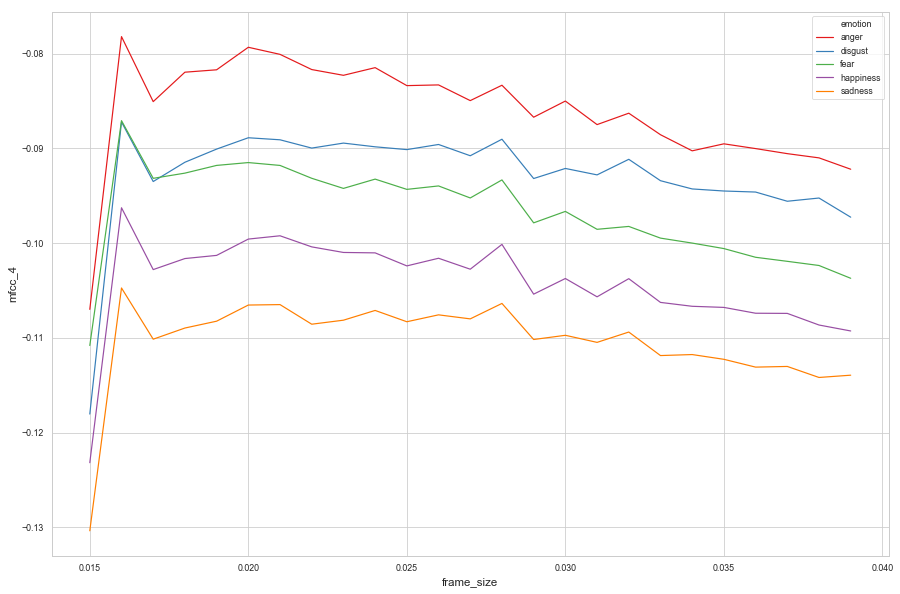

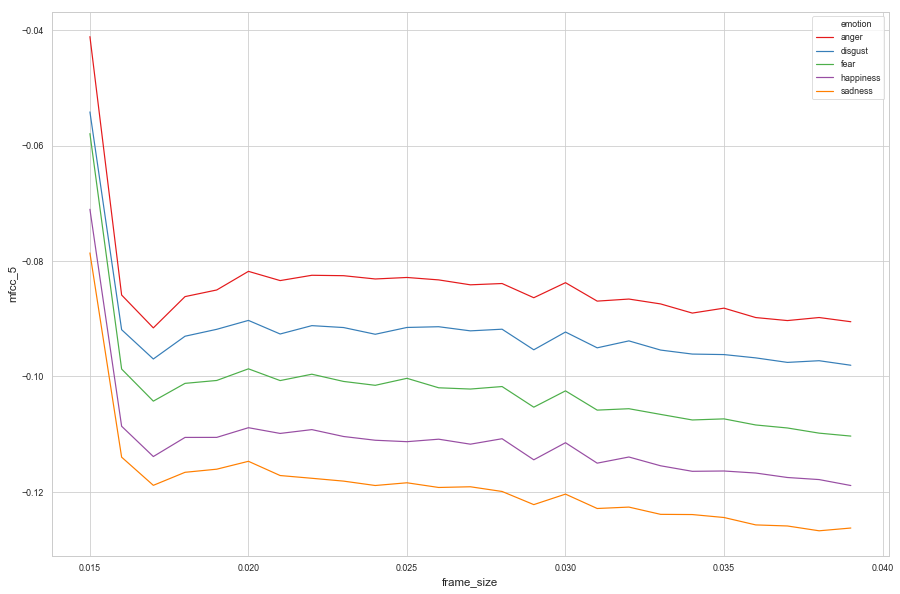

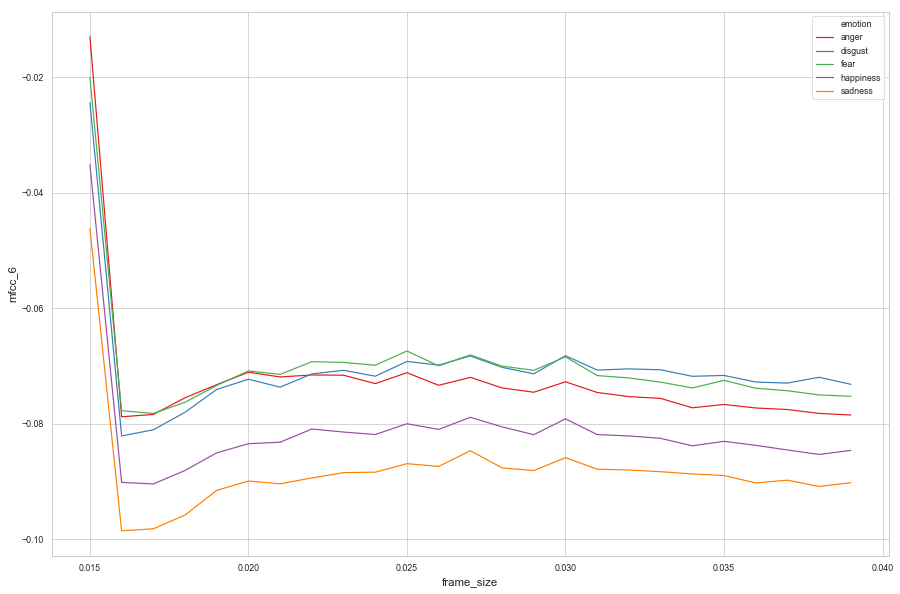

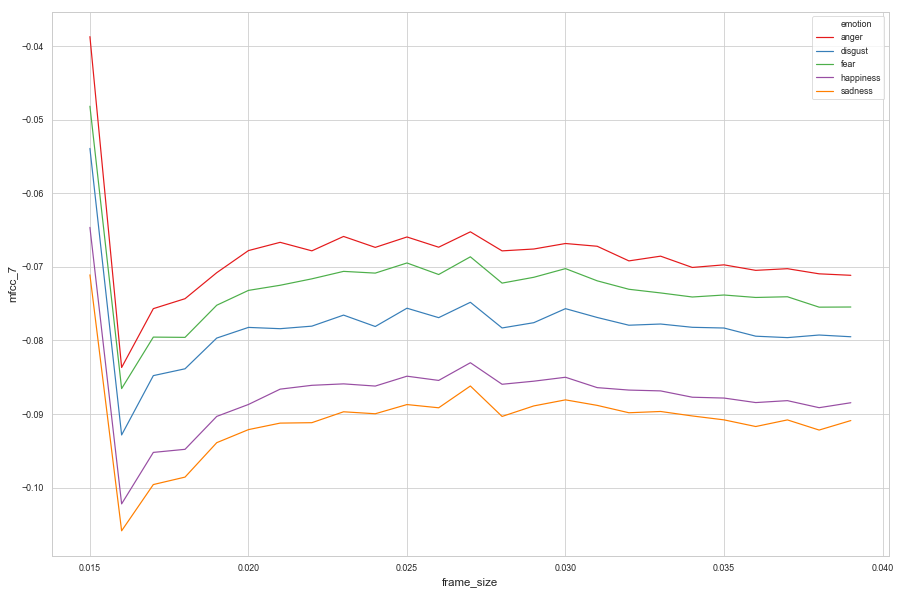

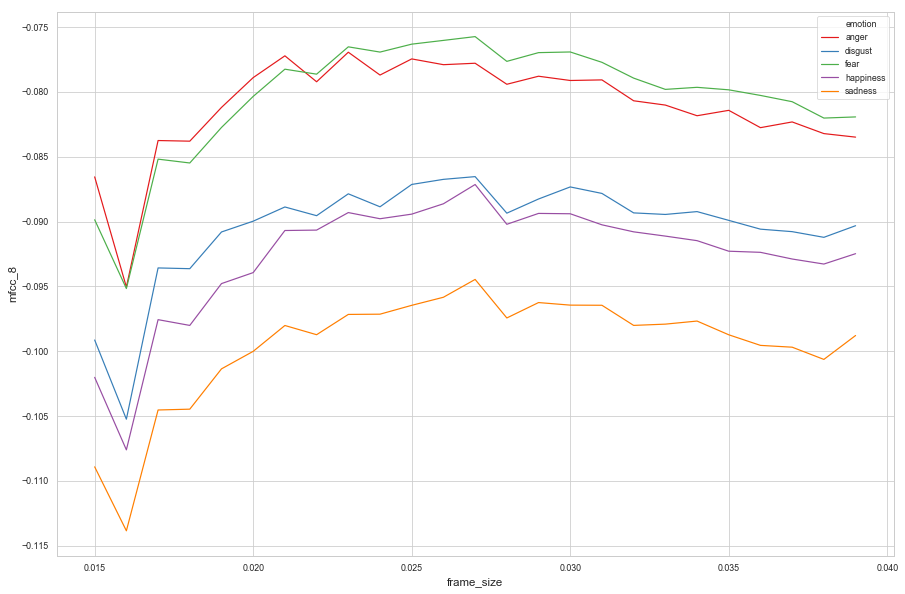

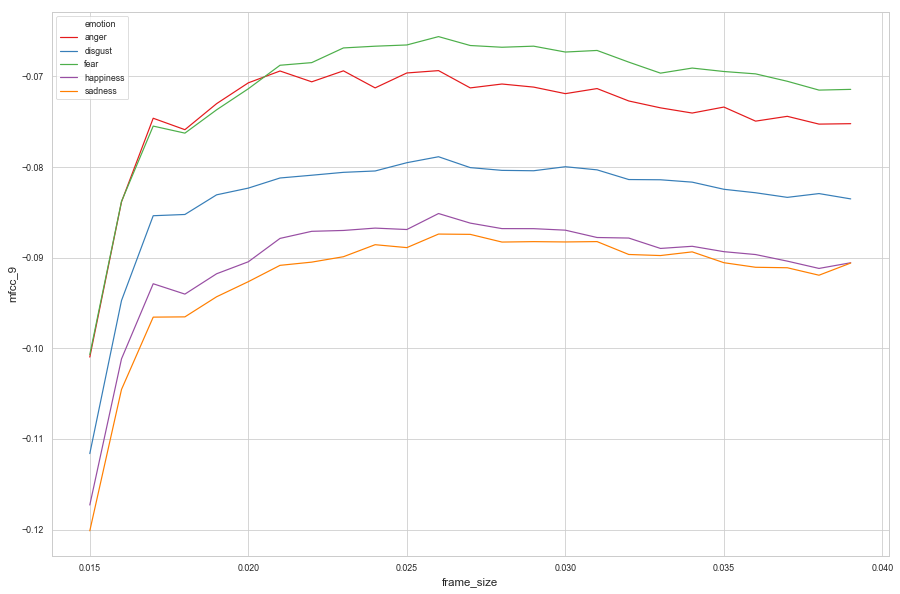

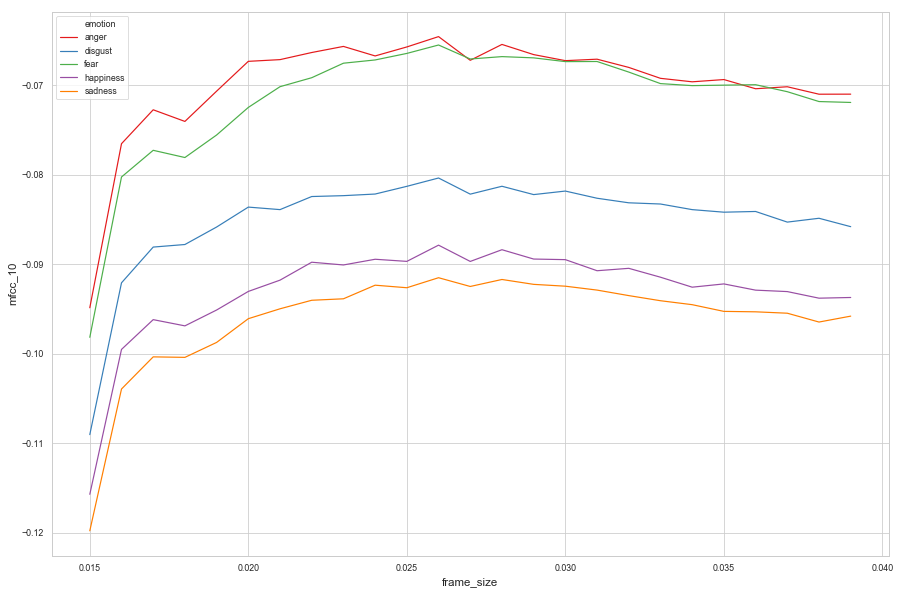

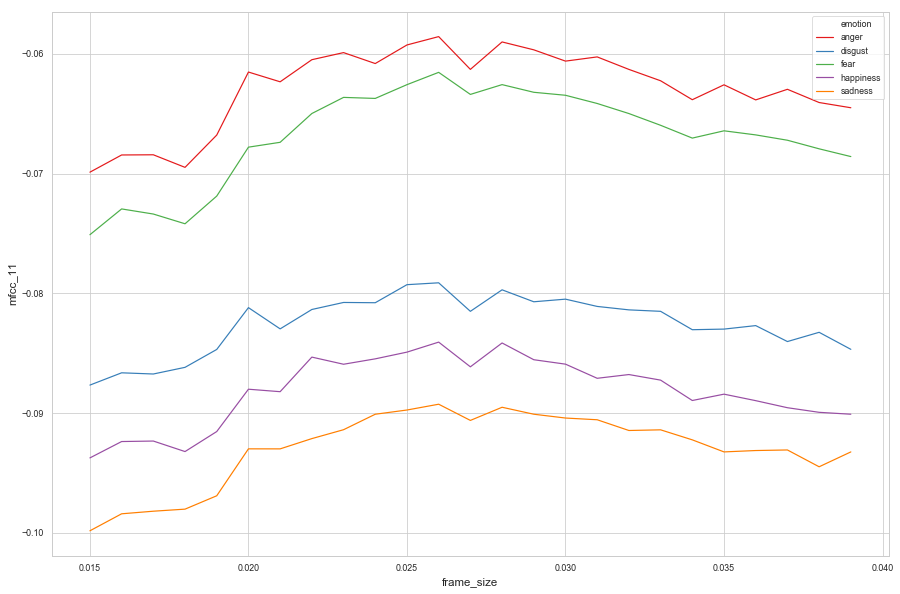

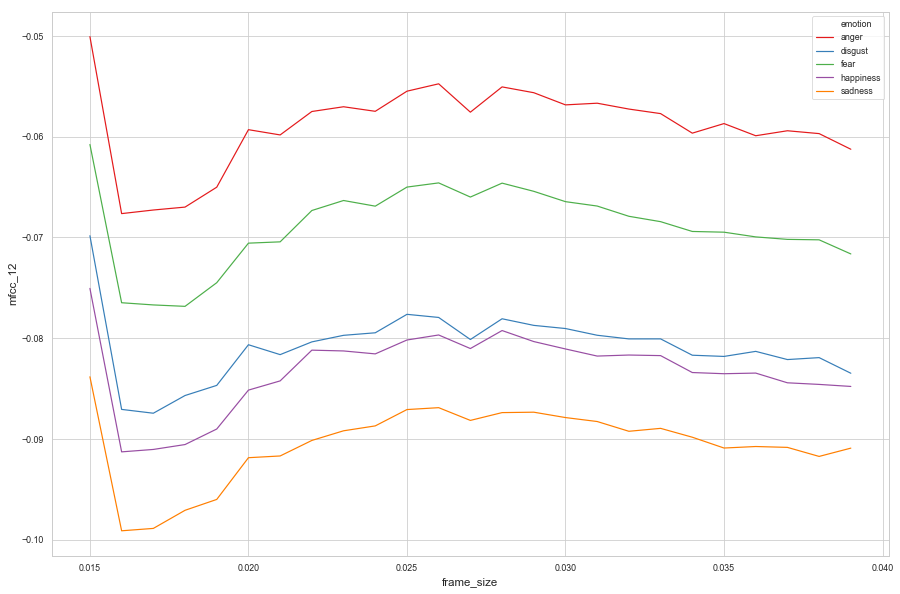

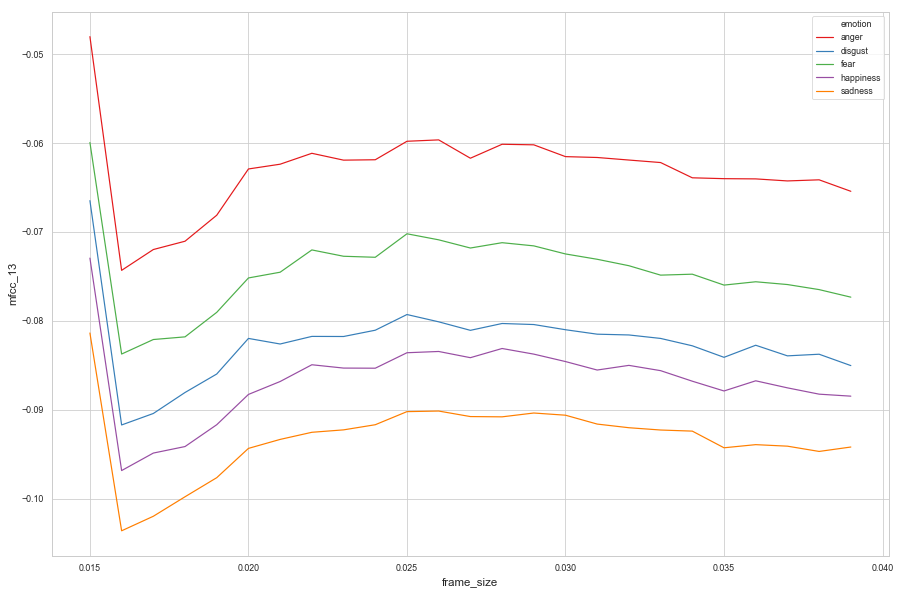

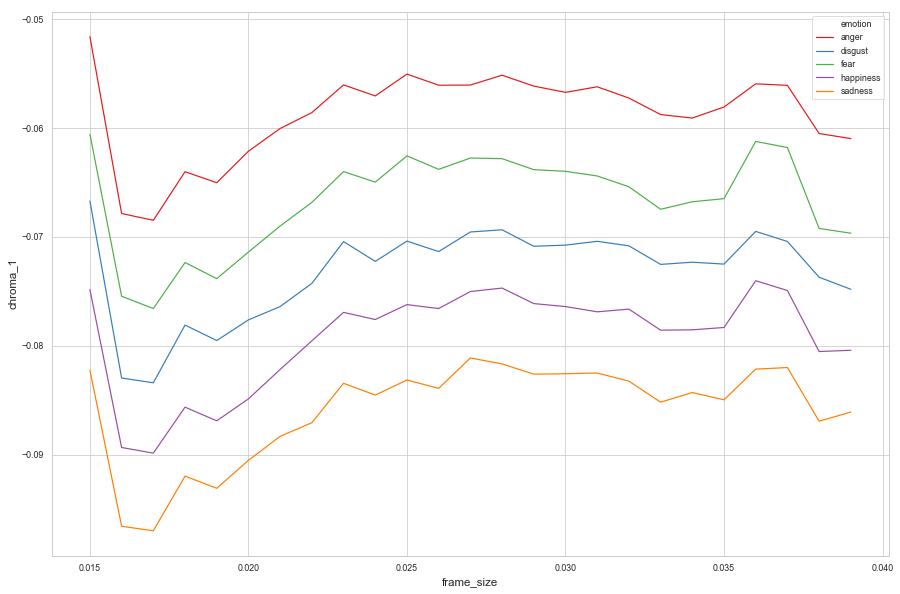

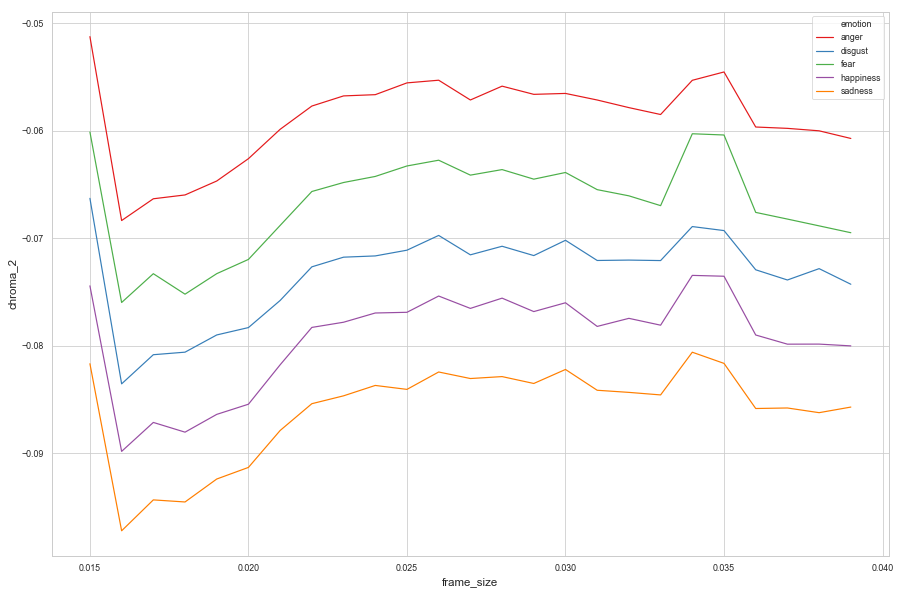

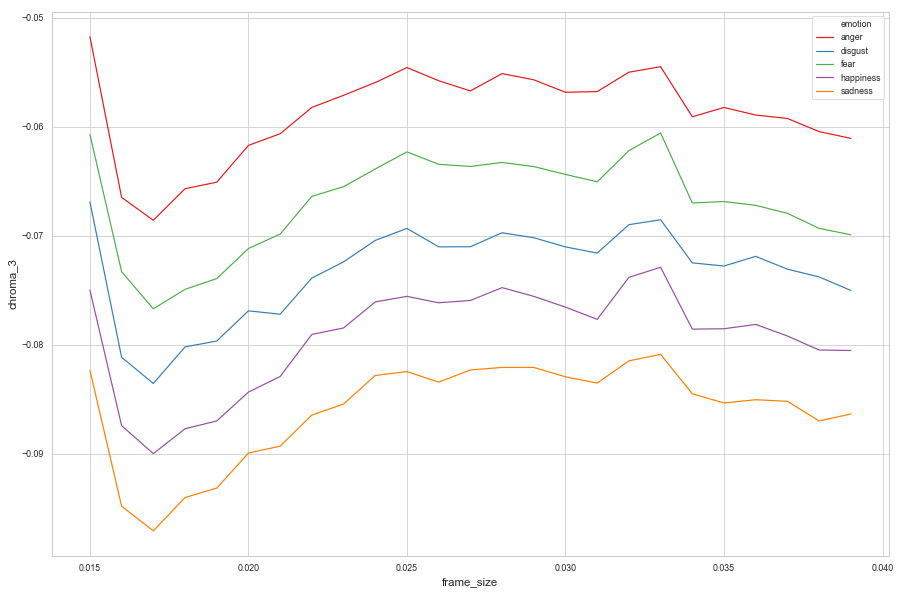

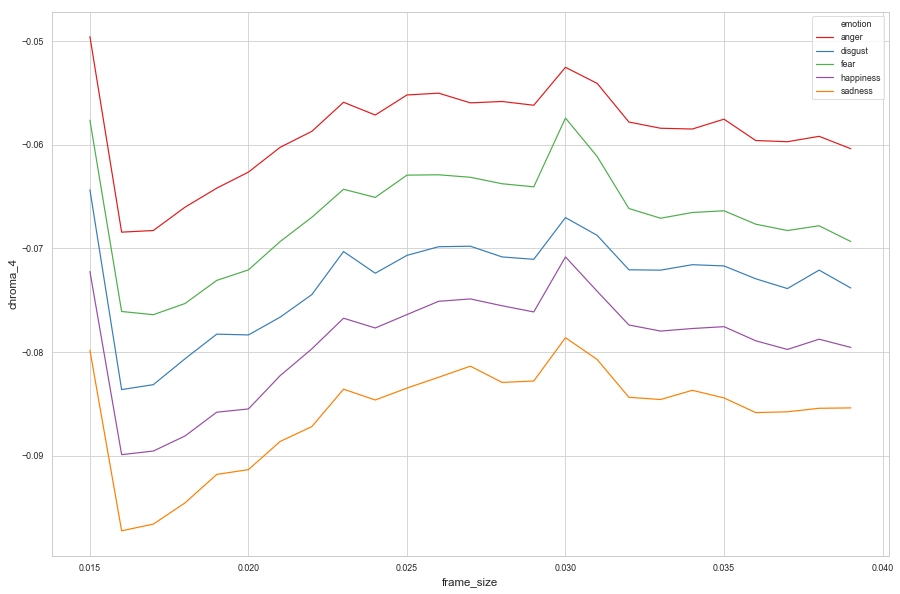

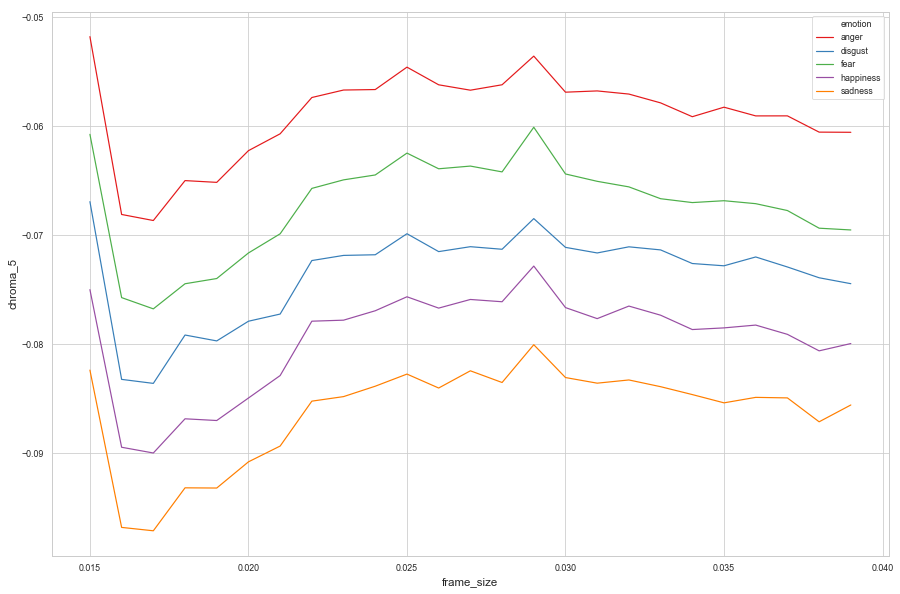

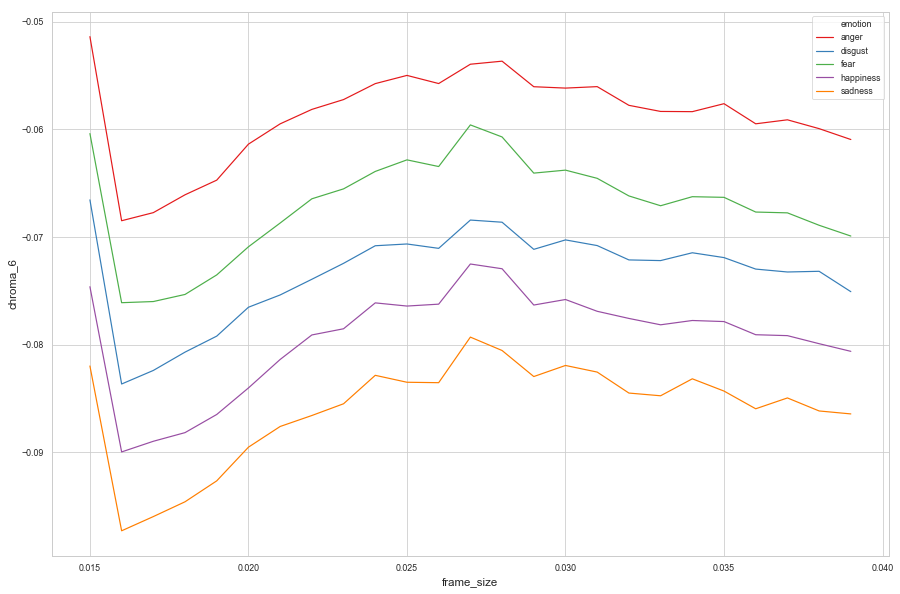

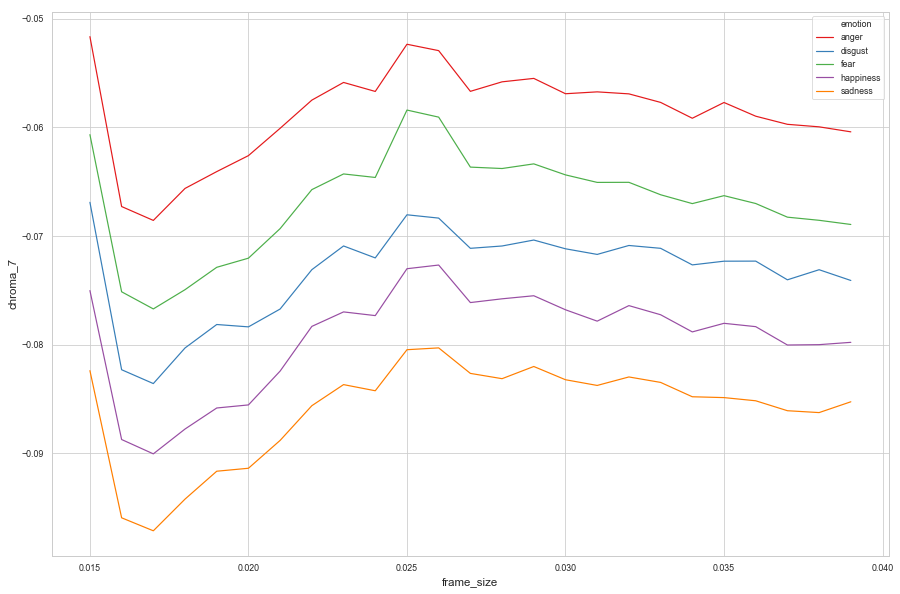

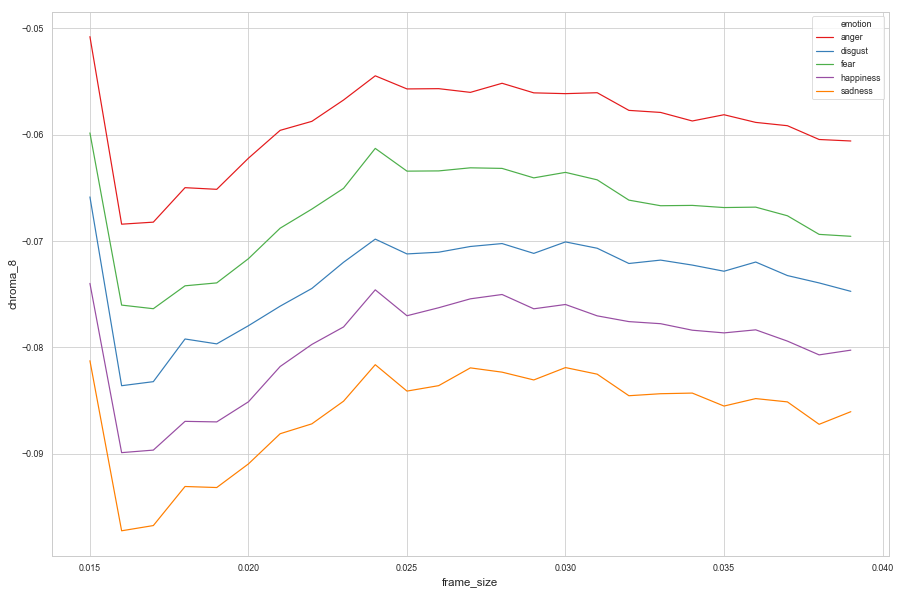

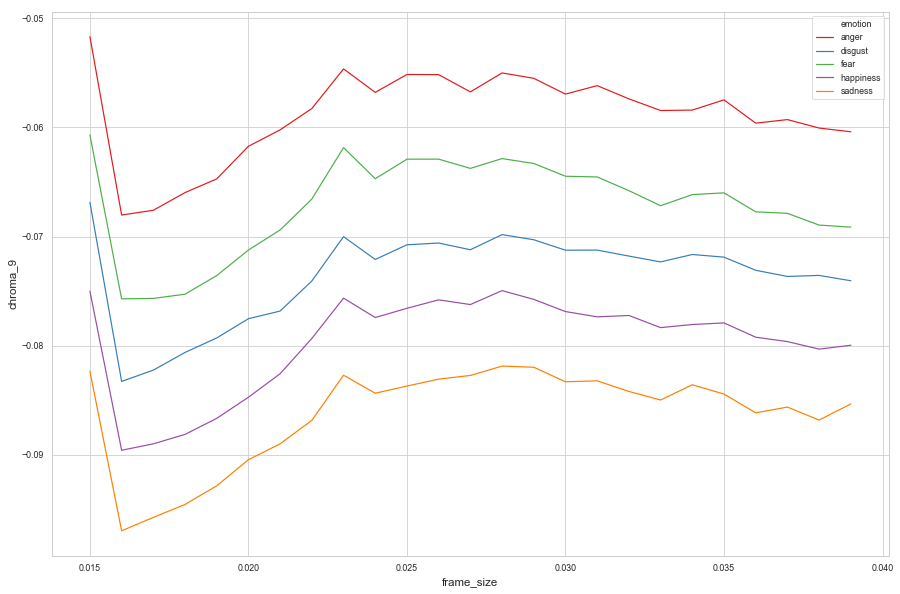

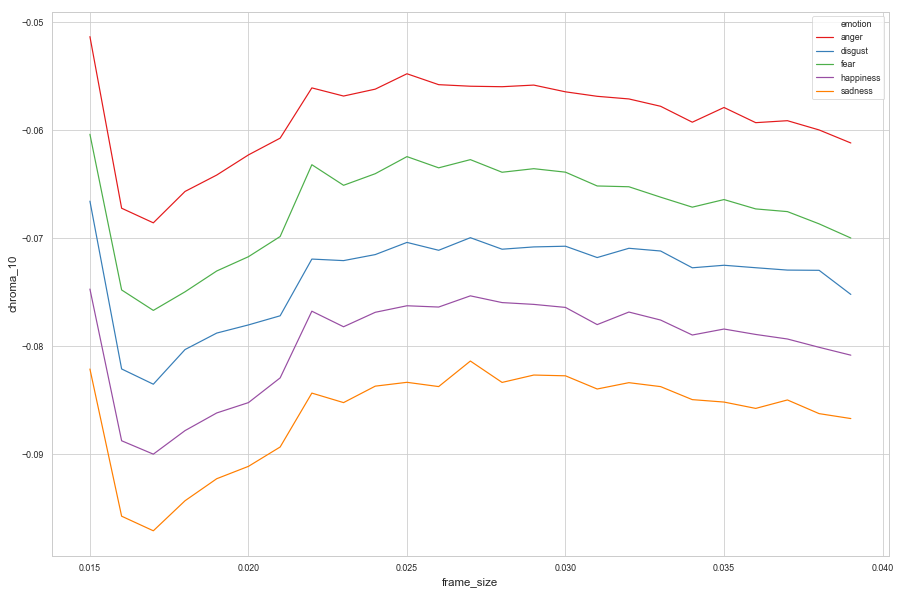

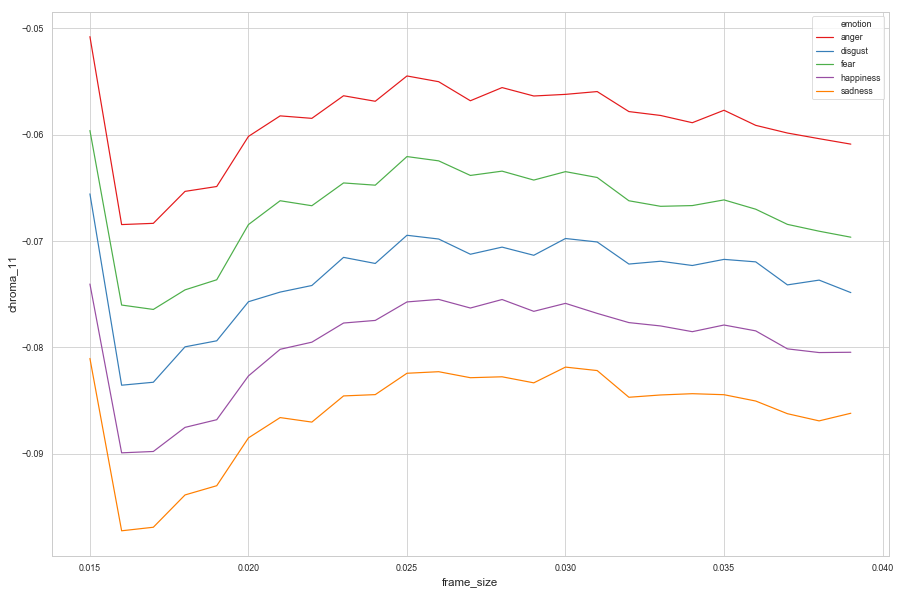

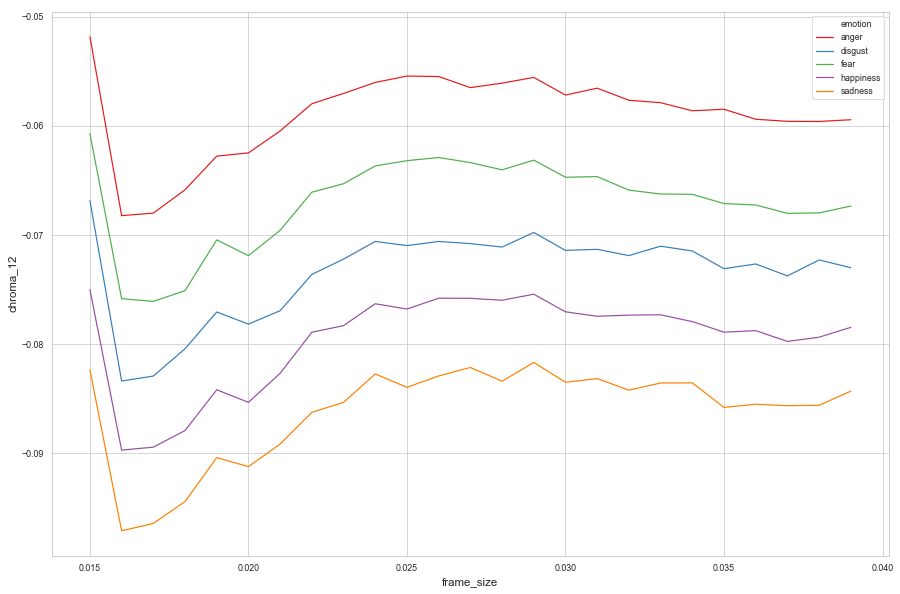

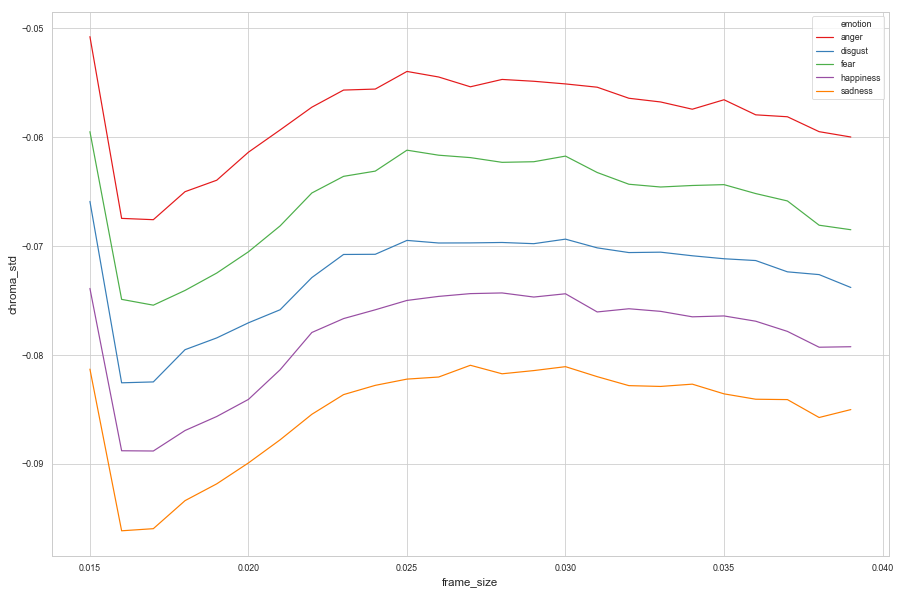

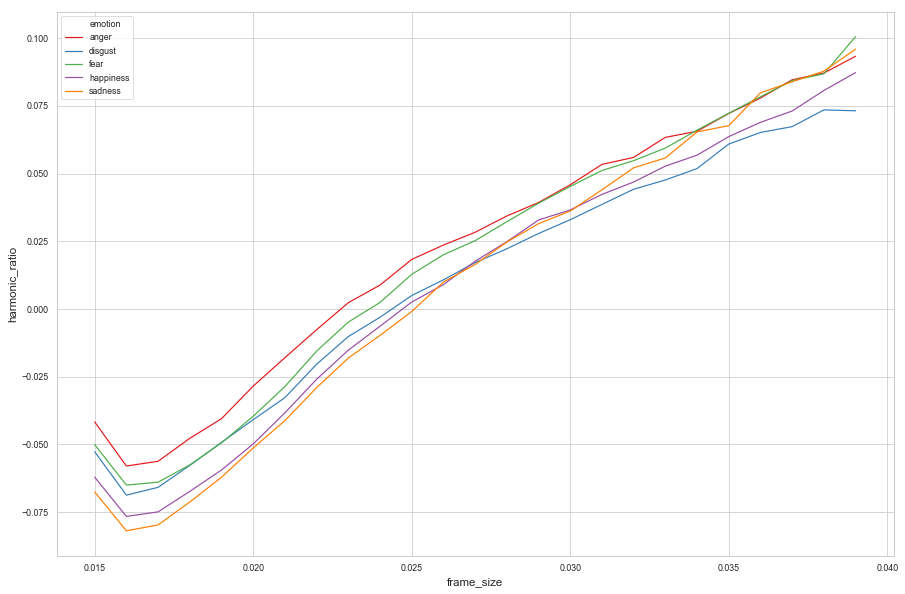

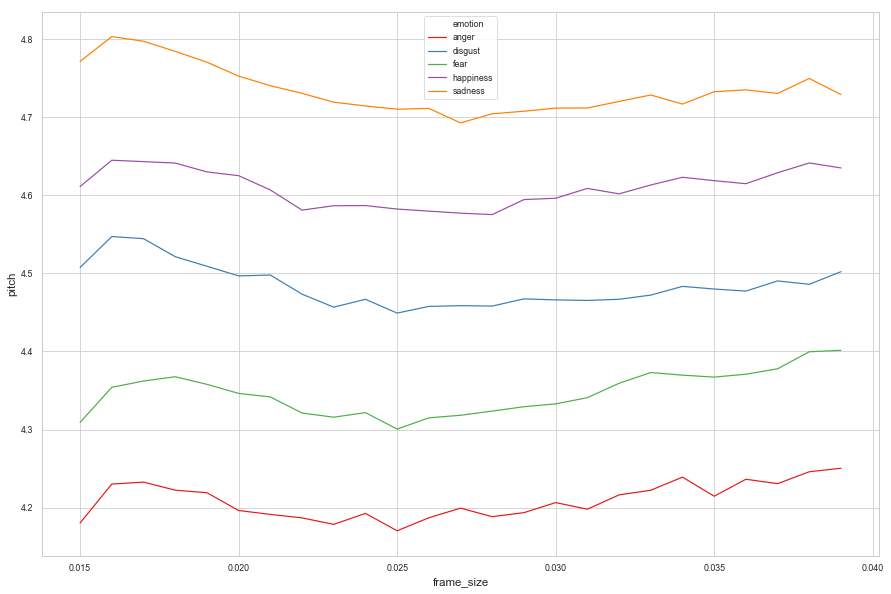

In [12]:
for column in df_compare_frame_size.drop(["frame_size","emotion"],axis=1):
    sns.lineplot(x="frame_size", y=column, hue="emotion", data=df_compare_frame_size)
    plt.show()
    

# Características

Cargando el array tridimensional de características

In [13]:
label_features = [
    'zcr', 'energy', 'energy_entropy', 'spectral_centroid', 'spectral_spread',
    'spectral_entropy', 'spectral_flux', 'spectral_rolloff', 'mfcc_1',
    'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8',
    'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13', 'chroma_1',
    'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7',
    'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11', 'chroma_12',
    'chroma_std', 'harmonic_ratio', 'pitch'
]


print("Loading features from file...\n")
features = pickle.load(open(dataset_path + dataset + '_features.p', 'rb'))

Loading features from file...



Creando un **dataframe con MultiIndex** a partir del objeto tridimensional

In [14]:
df = pd.DataFrame()
audio_index = []
row_index = []
i = 0
for single_audio in features:
    audio_index = np.full(shape=len(single_audio), fill_value=i)
    row_index = np.arange(len(single_audio))
    index_df = pd.DataFrame({"audio_number": audio_index, "row": row_index})

    single_audio_df = pd.DataFrame(single_audio, columns=label_features)

    aux_df = pd.concat([index_df, single_audio_df], axis=1)

    df = pd.concat([df, aux_df], axis=0, ignore_index=True)
    i += 1

df = df.set_index(["audio_number", "row"])
df.head()

zcr    energy  energy_entropy  spectral_centroid  \
audio_number row                                                          
0            0    0.194554  0.158372        0.641418           0.204143   
             1    0.178252  0.158229        0.622245           0.199069   
             2    0.178261  0.163400        0.569385           0.195337   
             3    0.176798  0.160960        0.487909           0.195810   
             4    0.175576  0.167701        0.406398           0.197826   

                  spectral_spread  spectral_entropy  spectral_flux  \
audio_number row                                                     
0            0           0.199731          0.409409       0.158372   
             1           0.199100          0.333950       0.160682   
             2           0.201712          0.223613       0.173149   
             3           0.200541          0.286649       0.169353   
             4           0.208070          0.219528       0.168518   

                  spectral_rolloff    mfcc_1    mfcc_2  ...  chroma_6  \
audio_number row                                        ...             
0            0            0.203411 -5.877320 -0.177262  ...  0.158632   
             1            0.190389 -5.885476 -0.073666  ...  0.158377   
             2            0.164633 -5.890838 -0.128553  ...  0.163436   
             3            0.184933 -5.899802  0.026776  ...  0.161187   
             4            0.171621 -5.902055  0.059048  ...  0.167827   

                  chroma_7  chroma_8  chroma_9  chroma_10  chroma_11  \
audio_number row                                                       
0            0    0.158504  0.159325  0.158872   0.159101   0.159672   
             1    0.158309  0.159438  0.158358   0.158812   0.161276   
             2    0.163419  0.163488  0.163404   0.163531   0.163483   
             3    0.161120  0.161497  0.160977   0.161316   0.167450   
             4    0.167734  0.168553  0.167738   0.167887   0.175663   

                  chroma_12  chroma_std  harmonic_ratio     pitch  
audio_number row                                                   
0            0     0.160327    0.166274        0.166509  0.158372  
             1     0.159012    0.165321        0.160994  0.158228  
             2     0.163502    0.175604        0.167301  0.163399  
             3     0.161893    0.167779        0.167298  0.160960  
             4     0.167761    0.175442        0.169039  0.167699  

[5 rows x 36 columns]

Función para la representación de los boxplot de cada caraterística

In [15]:
def display_boxplot(feature, df, df_emotions):
    df_features_mean = pd.DataFrame(columns=label_features)
    for i in range(0, df_emotions.size):
        df_features_mean = df_features_mean.append(df.loc[i].mean(),
                                                   ignore_index=True)
    df_aux = pd.concat([df_emotions, df_features_mean], axis=1)

    sns.boxplot(x=df_aux["emotion"], y=df_aux[feature])
    plt.xlabel("emotion", fontsize=20)
    plt.ylabel(feature, fontsize=20)
    plt.tick_params(labelsize=17)
    plt.show()

## Zero Crossing Rate (zcr)

ZCR calcula el **promedio ponderado de la cantidad de veces que la señal de voz cambia de signo** dentro de una ventana de tiempo particular.


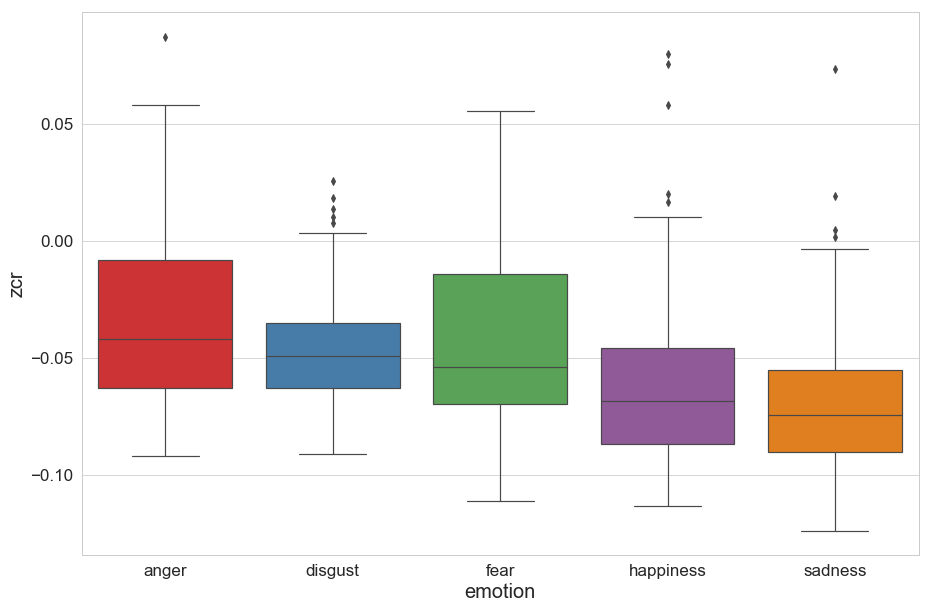

In [16]:
display_boxplot("zcr", df, df_emotions)

## Energy (energy)

Log-energy indica la amplitud cuadrada total en un segmento del habla. 
Esta característica es simplemente la **cantidad de potencia o volumen normalizado en la señal.**

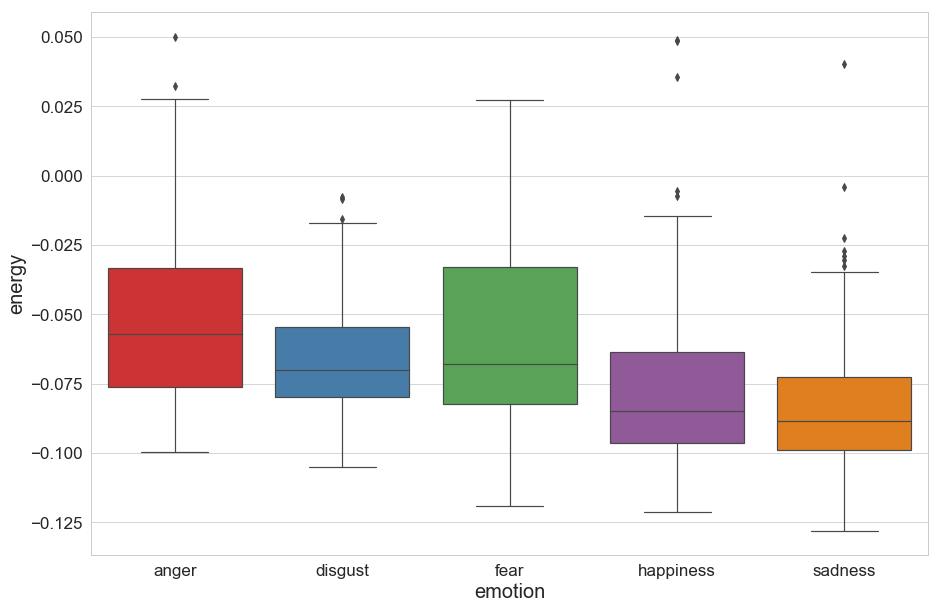

In [17]:
display_boxplot("energy", df, df_emotions)

## Entropy of Energy (energy_entropy)

La entropía de las energías normalizadas de los sub-frames. Puede interpretarse como una medida de cambios abruptos.

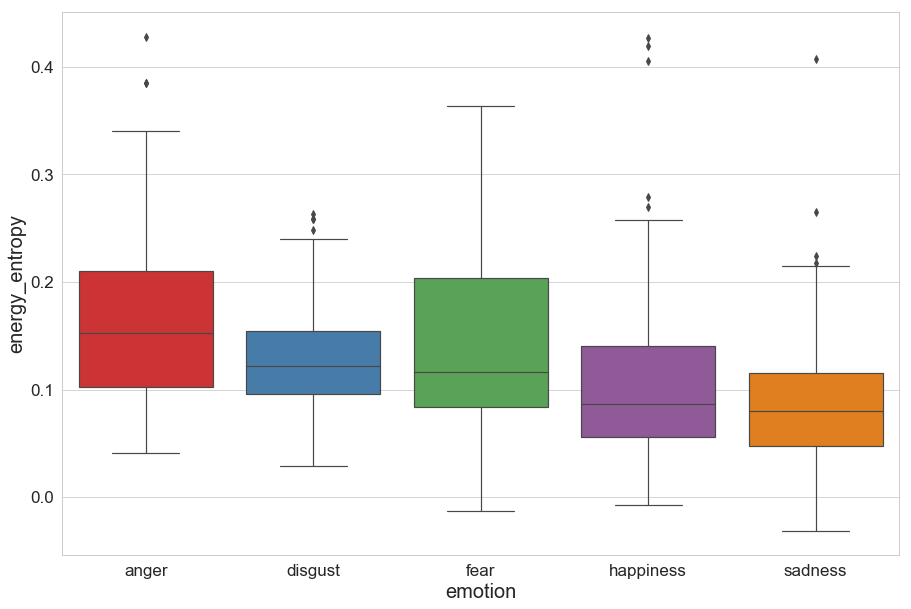

In [18]:
display_boxplot("energy_entropy", df, df_emotions)

## Pitch (pitch)

El tono puede cuantificarse como una frecuencia, pero el tono no es una propiedad física puramente objetiva; es un atributo psicoacústico subjetivo del sonido.

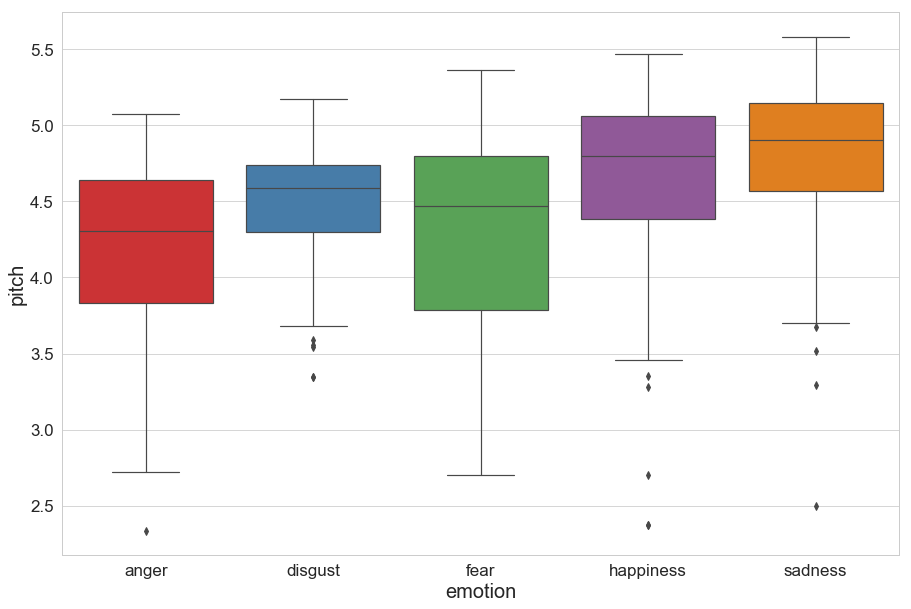

In [19]:
display_boxplot("pitch", df, df_emotions)

## Harmonic ratio (harmonic_ratio)

El ratio entre la energía en la porción armónica del frame respecto a la total.

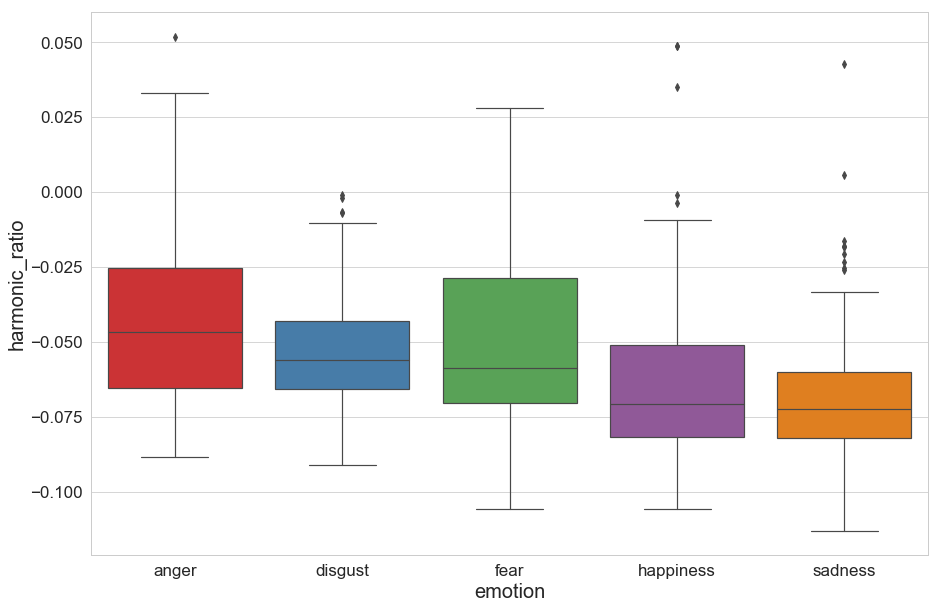

In [20]:
display_boxplot("harmonic_ratio", df, df_emotions)

# Spectral

## Spectral Centroid (spectral_centroid)

El centro de gravedad del espectro.

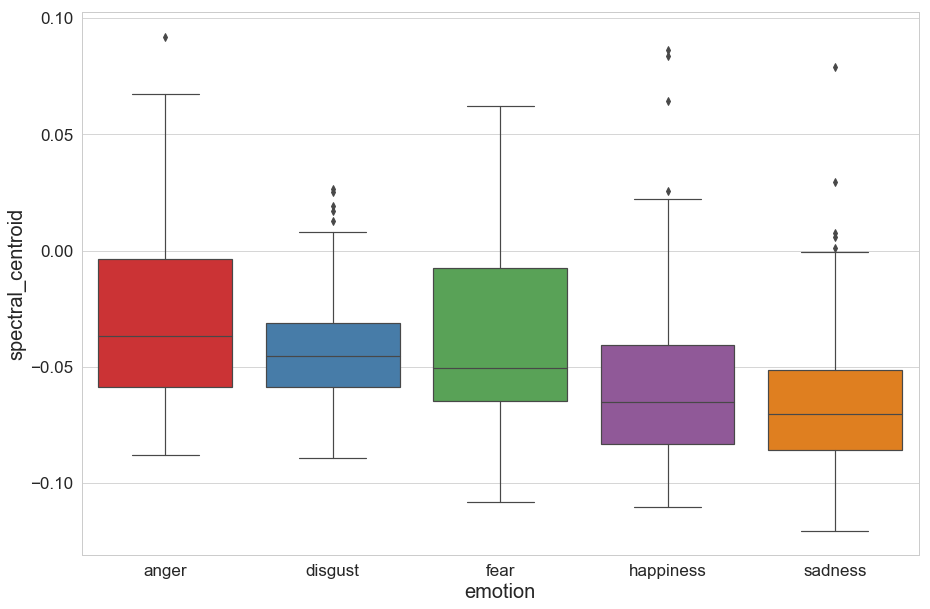

In [21]:
display_boxplot("spectral_centroid", df, df_emotions)

## Spectral Spread (spectral_spread)

The second central moment of the spectrum.

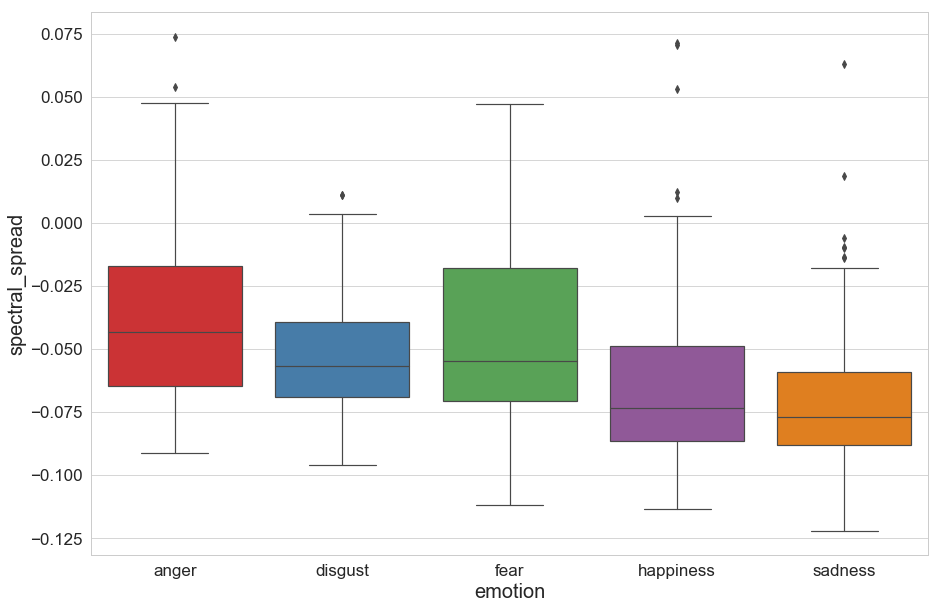

In [22]:
display_boxplot("spectral_spread", df, df_emotions)

## Spectral Entropy (spectral_entropy)

Entropía de las energías espectrales normalizadas para un conjunto de subframes.

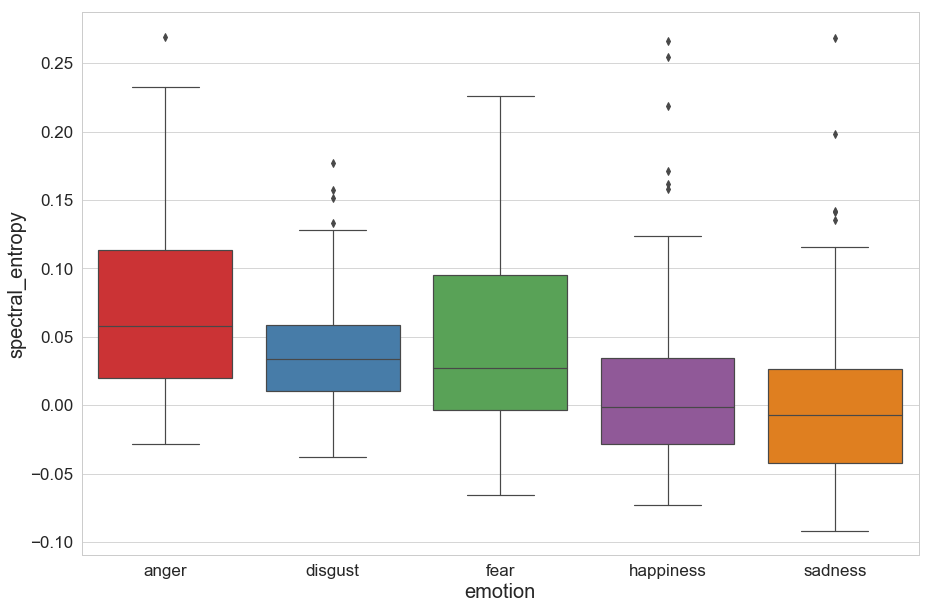

In [23]:
display_boxplot("spectral_entropy", df, df_emotions)

## Spectral Flux (spectral_flux)

La diferencia al cuadrado entre las magnitudes normalizadas de los espectros de los dos frames sucesivos.

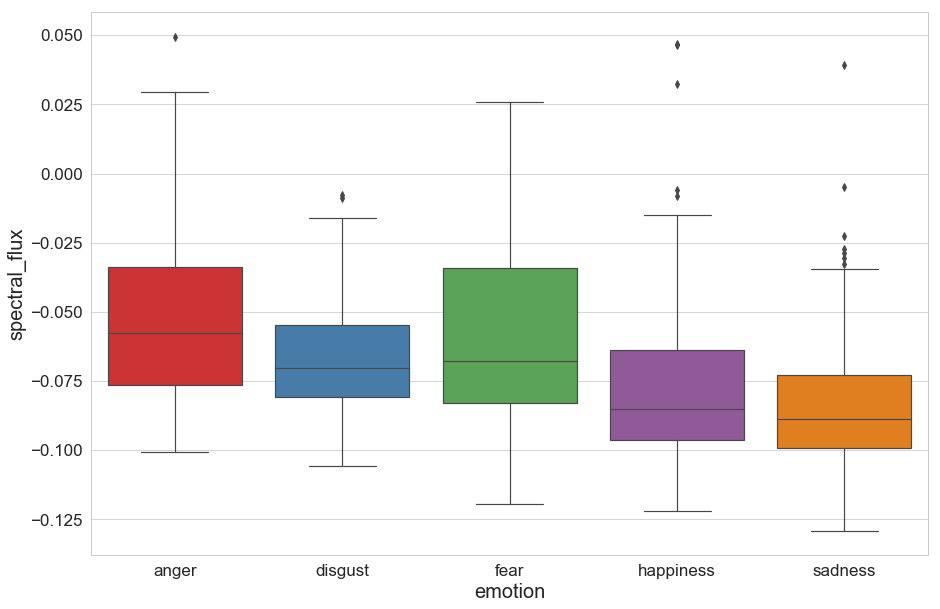

In [24]:
display_boxplot("spectral_flux", df, df_emotions)

## Spectral Rolloff (spectral_rolloff)

La frecuencia por debajo de la cual se concentra el 90% de la distribución de la magnitud del espectro.

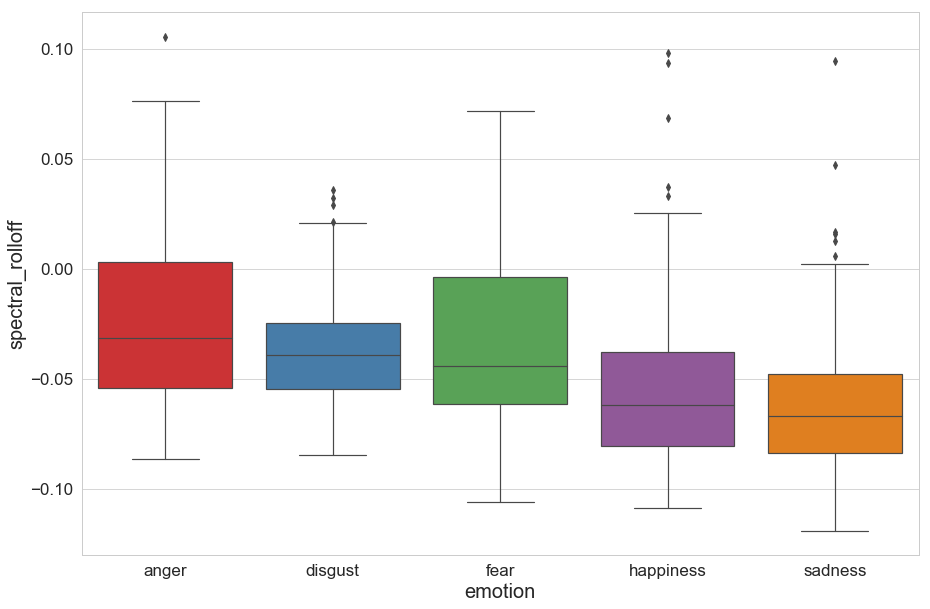

In [25]:
display_boxplot("spectral_rolloff", df, df_emotions)

## MFCCs  (mfcc_< X >)

Los Mel Frequency Cepstral Coeﬃcients (Coeﬁcientes Cepstrales en las Frecuencias de Mel) o MFCCs **son coeﬁcientes para la representación del habla basados en la percepción auditiva humana**.

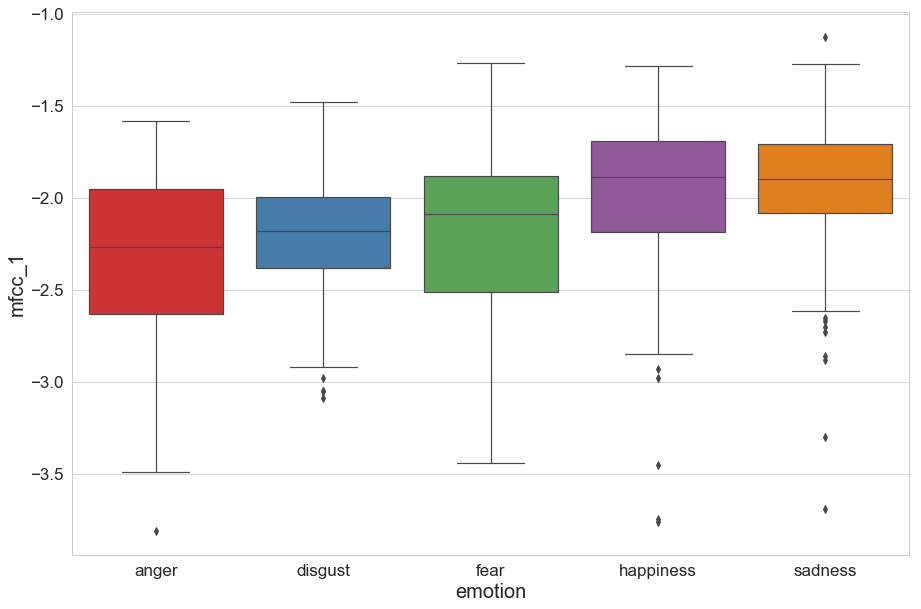

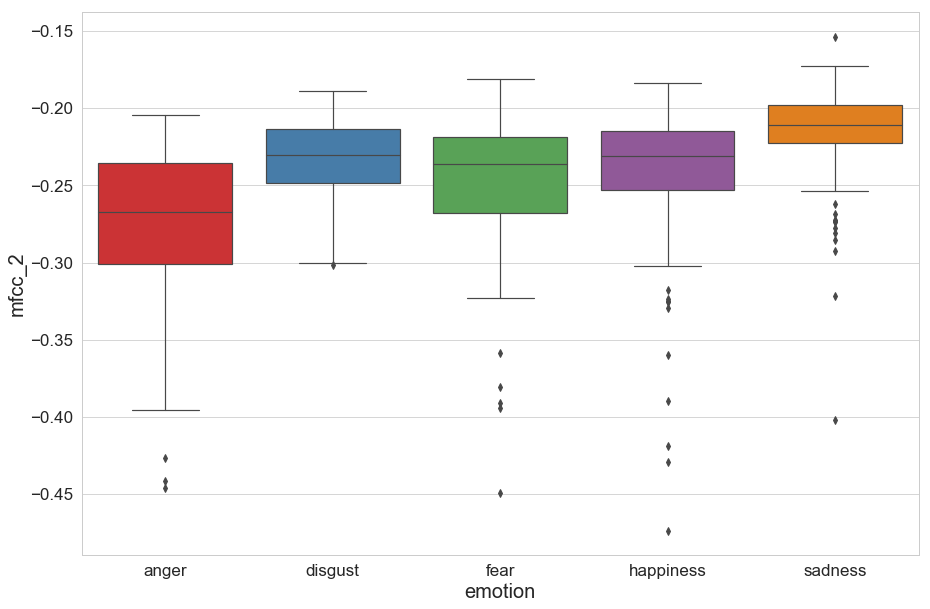

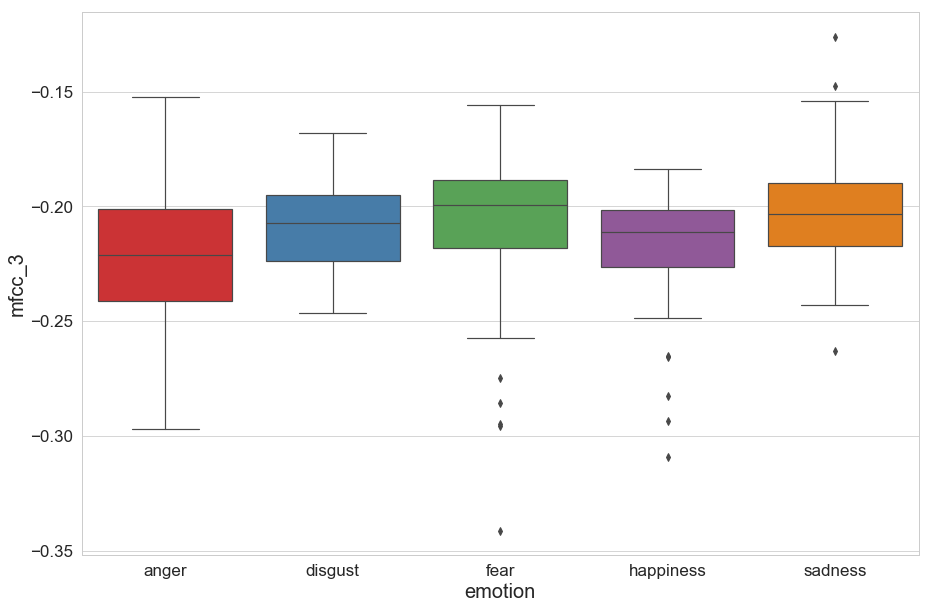

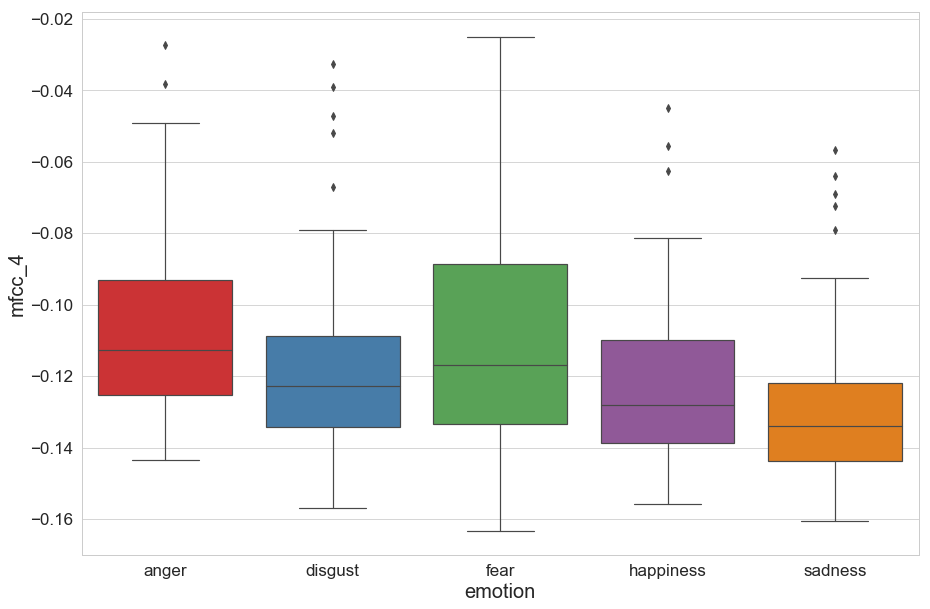

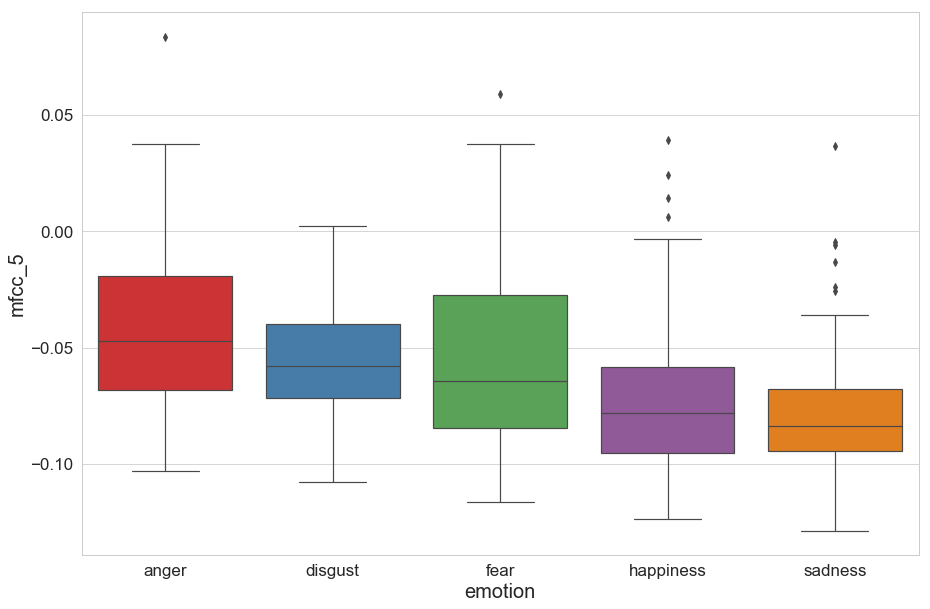

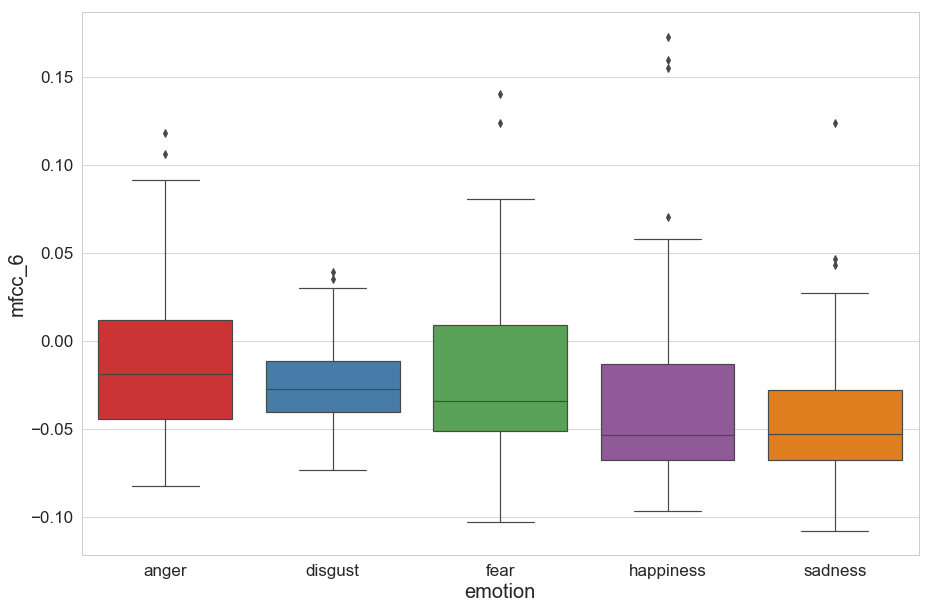

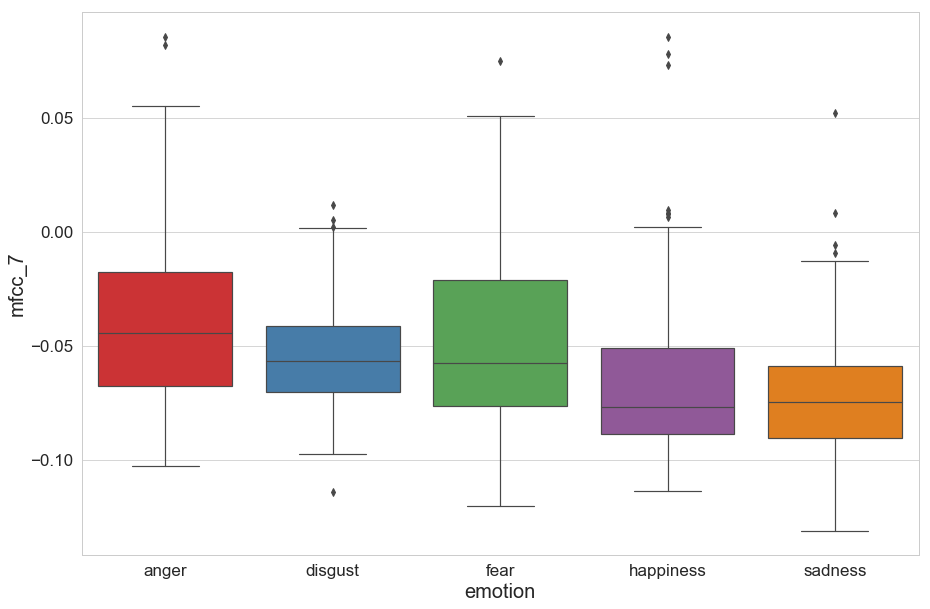

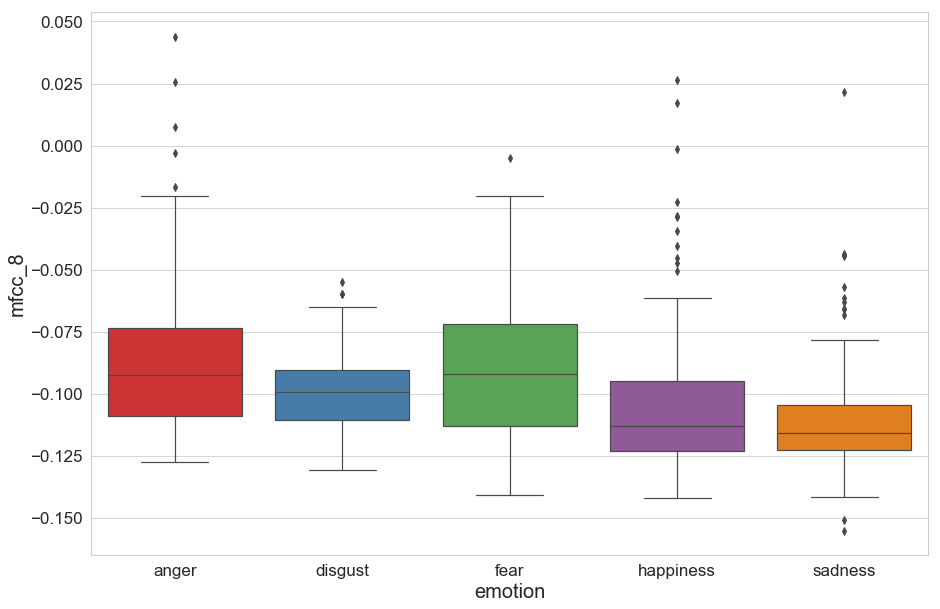

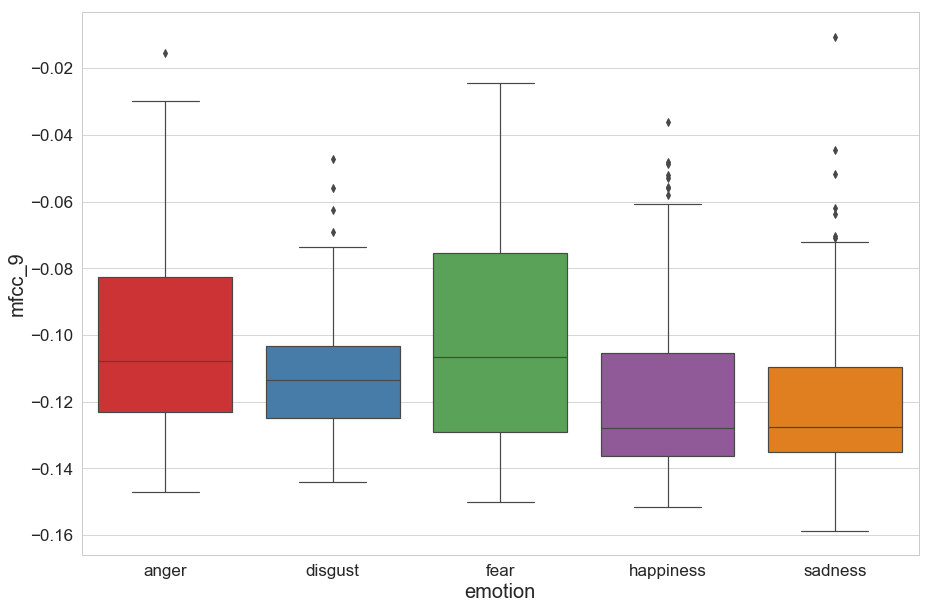

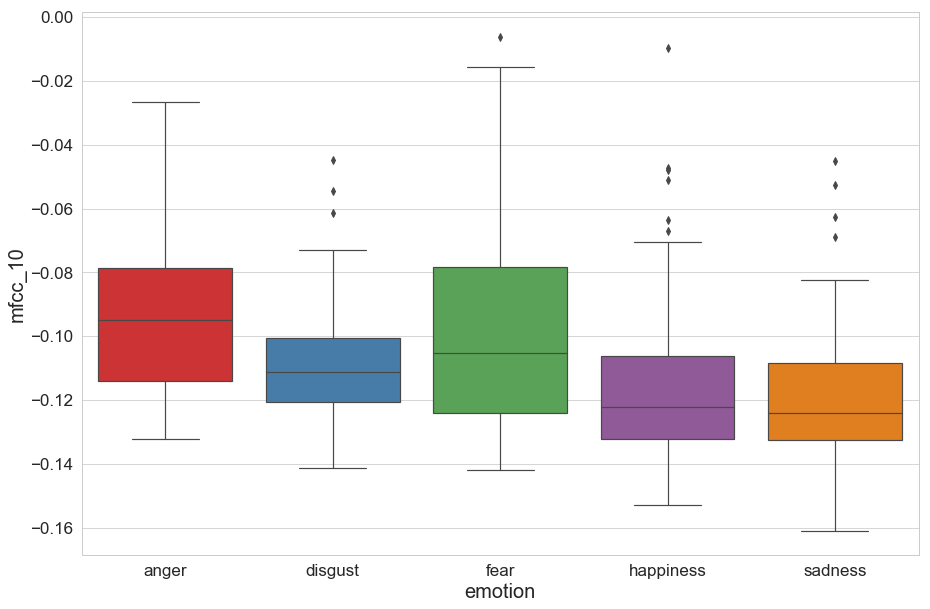

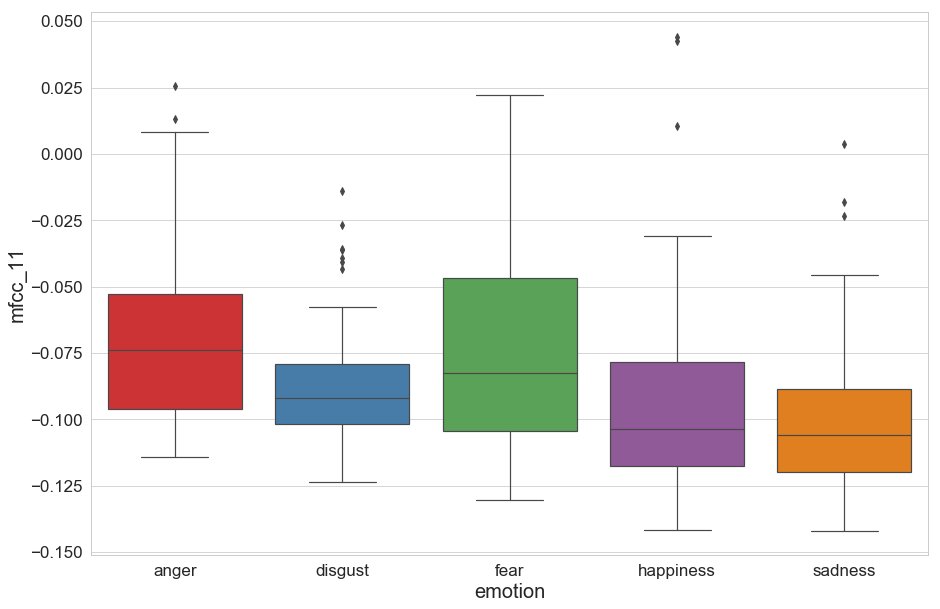

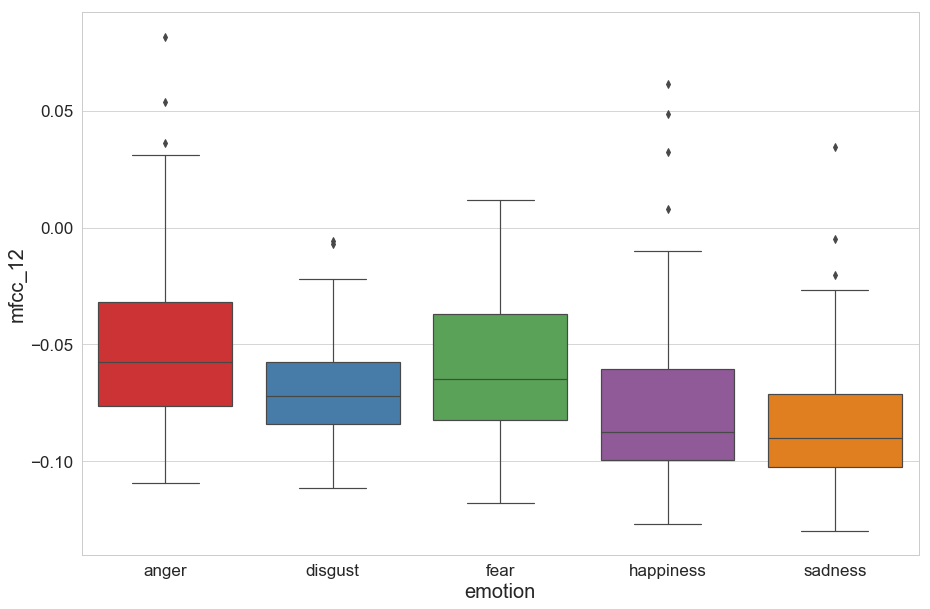

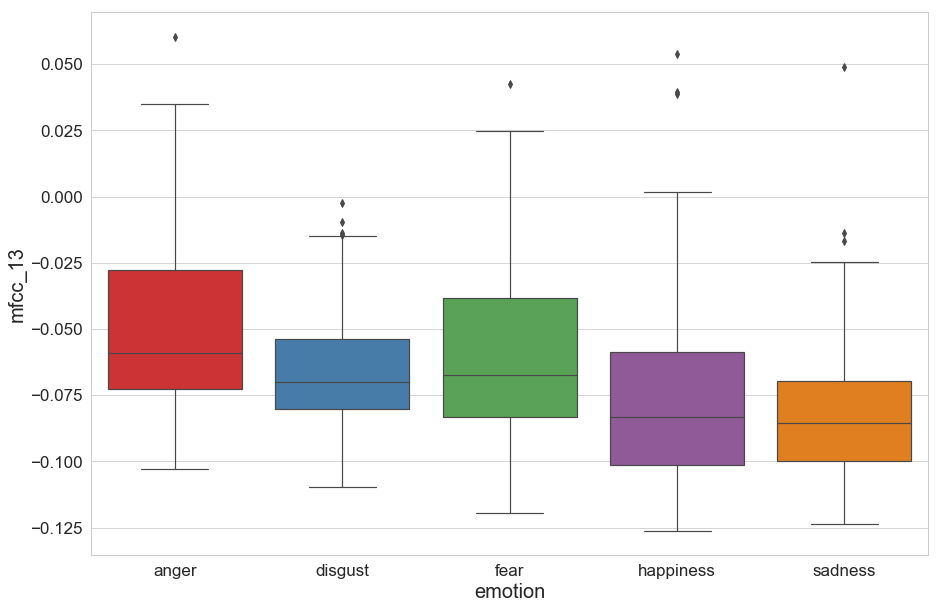

In [26]:
for mfcc in label_features[8:21]:
    display_boxplot(mfcc, df, df_emotions)

## Chroma Vector (chroma_< X >) - Chroma Deviation (chroma_std)

Una representación de 12 elementos de la energía espectral en la que los intervalos **representan las 12 clases de tonos de la música de tipo occidental** (espaciado de semitono).

La desviación estándar de los 12 coeficientes 

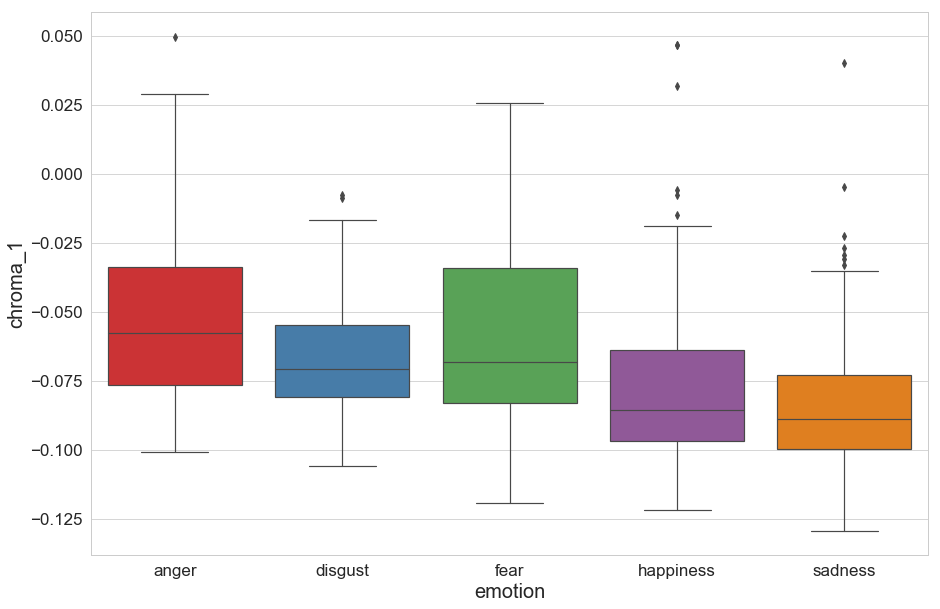

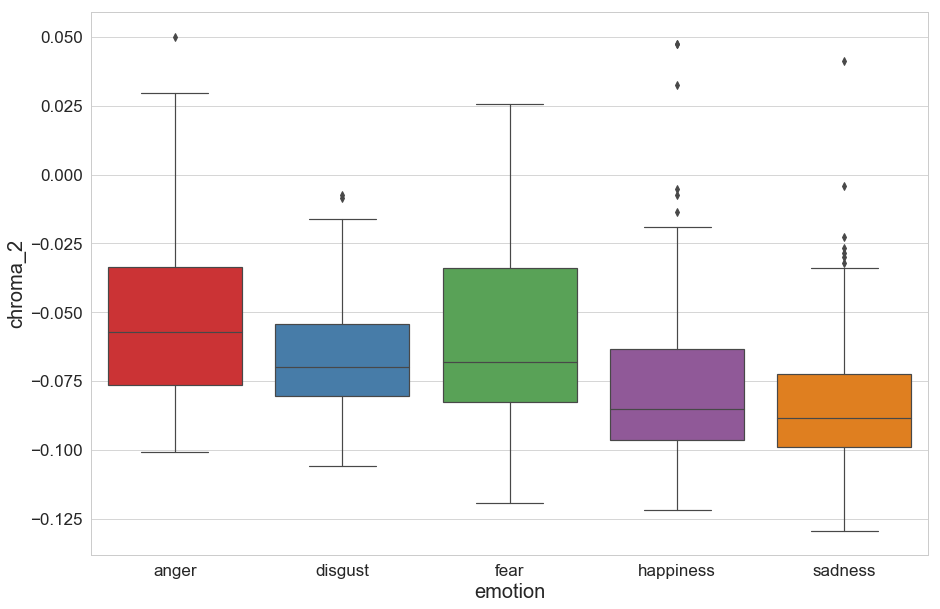

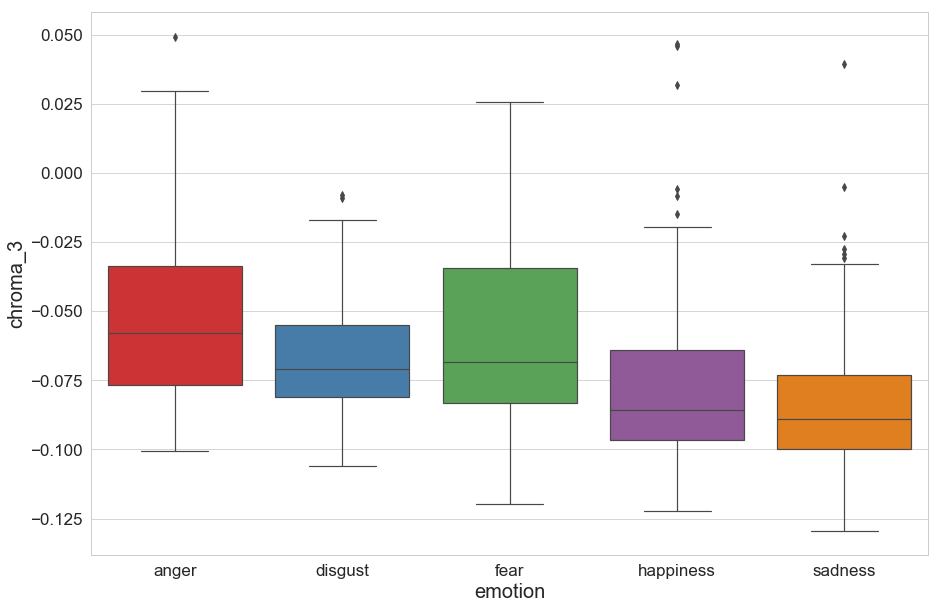

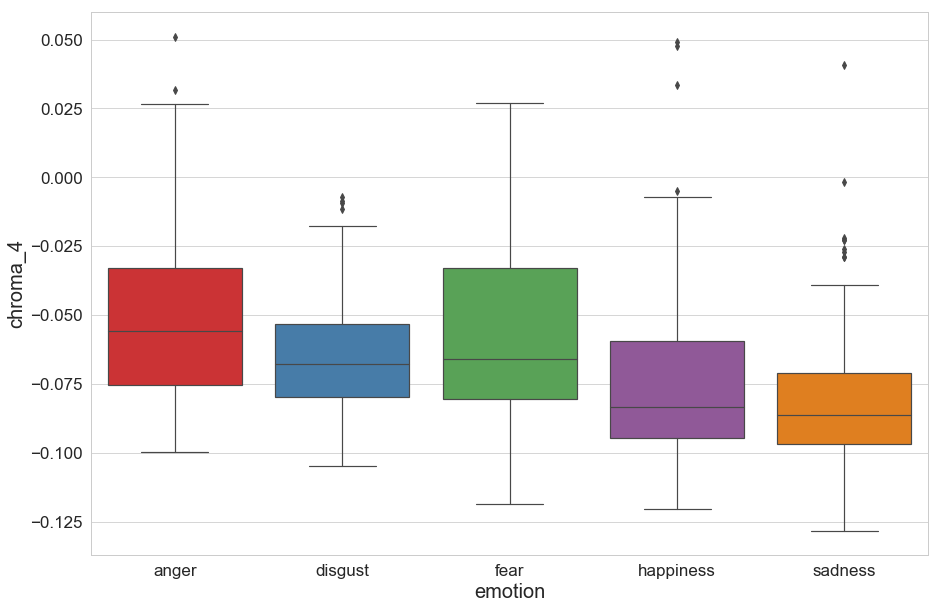

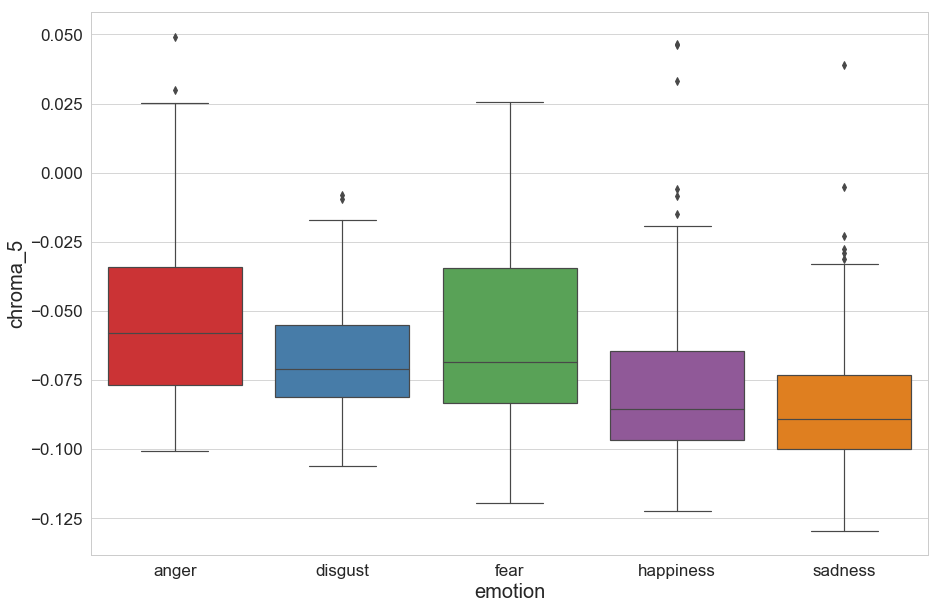

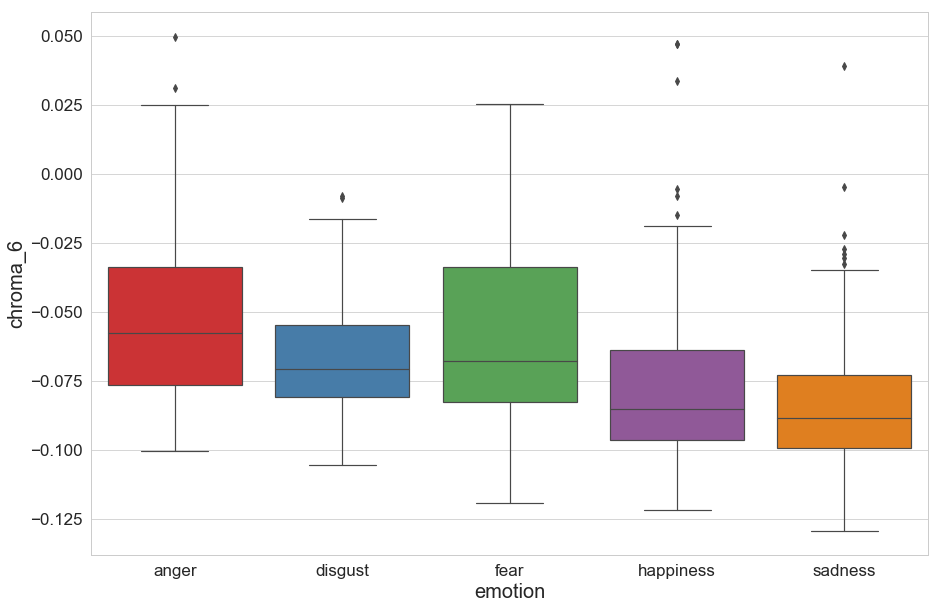

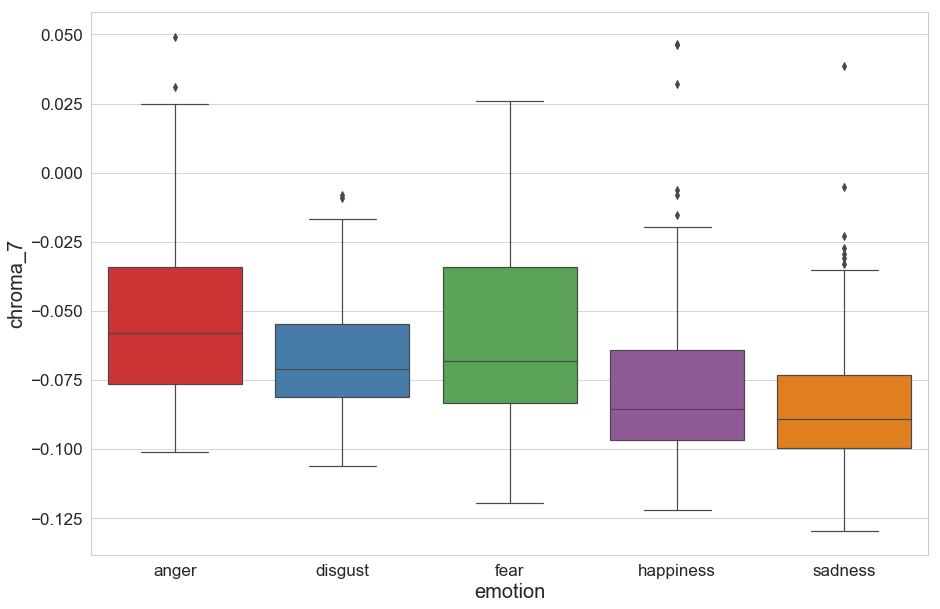

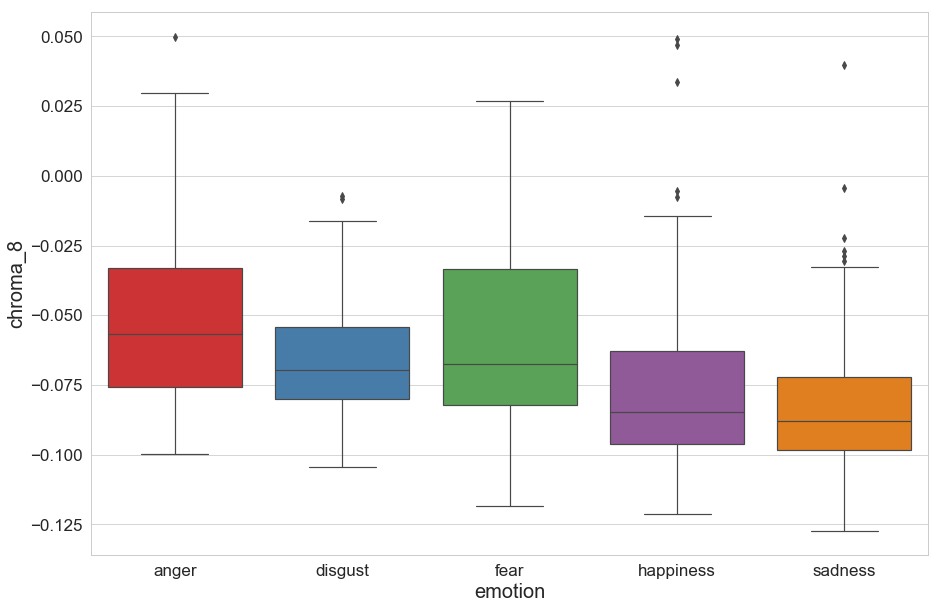

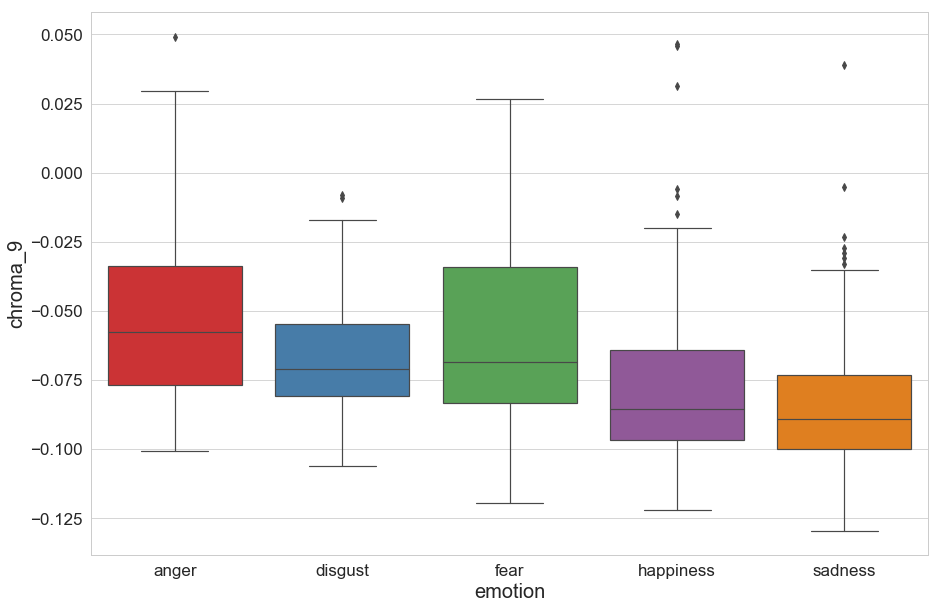

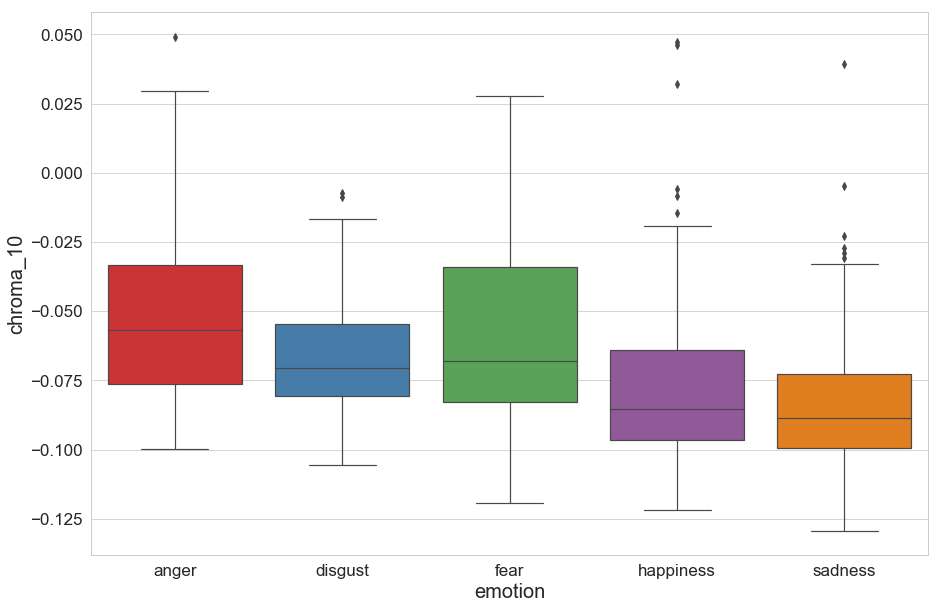

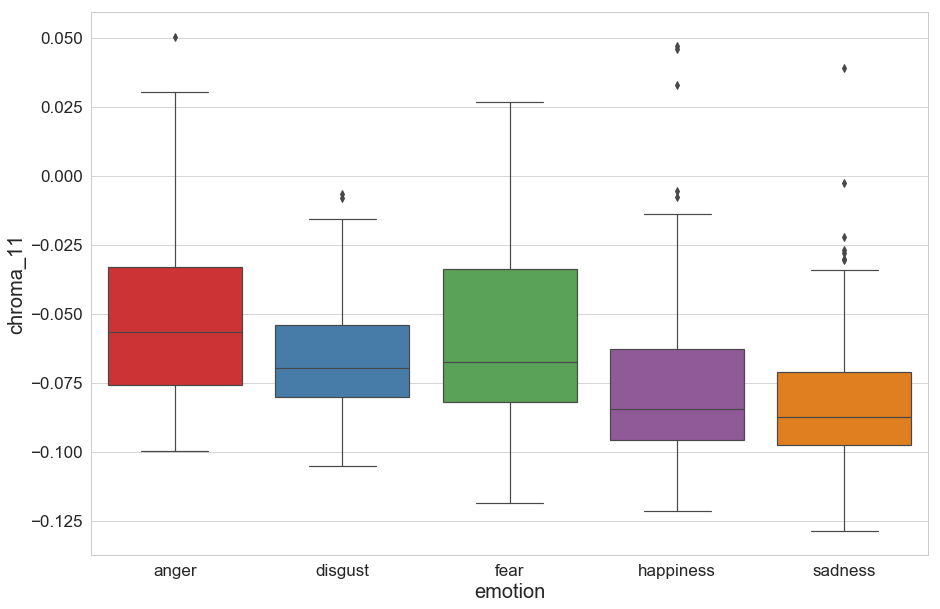

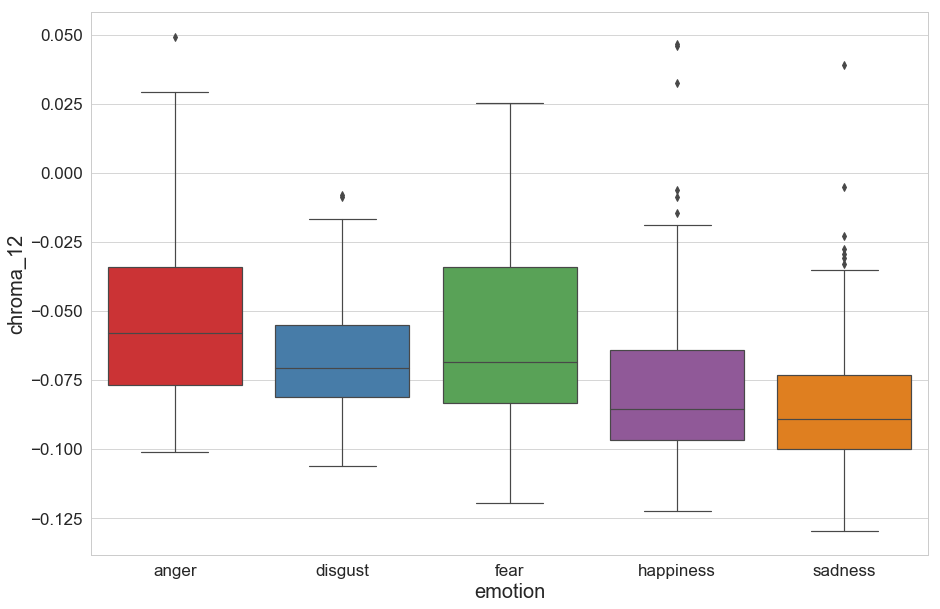

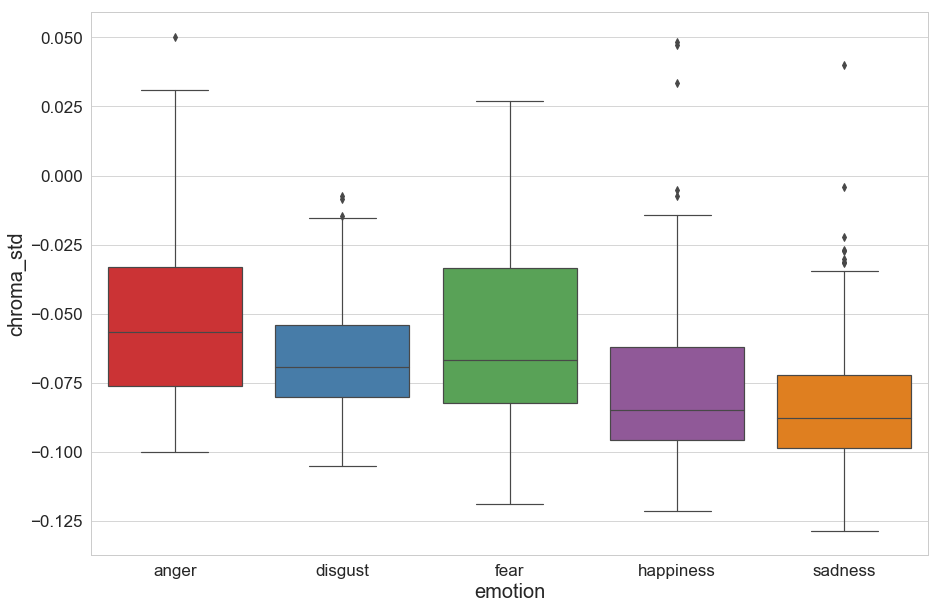

In [27]:
for chroma in label_features[21:34]:
    display_boxplot(chroma, df, df_emotions)